#Entrega 1

##Integrantes


* Juan José Acevedo Dávila 
* Juan Sebastián Zuluaga Montenegro
* Vladimir Martin Quiroz

##INFORMACIÓN

**1. Caso de estudio**

La agencia de marketing Sterling Cooper Advertising tiene en su planta de empleados alrededor de 4.000 personas directamente contradas. Sin embargo, el departamento de recursos humanos ha reportado cifras preocupantes a la dirección de la agencia, indicando que cada año, alrededor del 15% de sus empleados abandonan la empresa y necesitan ser reemplazados, en la mayoría de casos, con muy poco tiempo para el proceso de selección y contratación. La dirección cree que este nivel de bajas (empleados que se marchan, ya sea por decisión propia o porque son despedidos) es perjudicial para la empresa, por las siguientes razones:


*   Los proyectos de los antiguos empleados se retrasan, lo que dificulta el cumplimiento de los plazos, con la consiguiente pérdida de reputación entre sus clientes y socios.
*   El departamento de recursos humanos requiere mucha inversión por los niveles de rotación, así que la mayoría de su personal está dedicado a tareas de reclutamiento de nuevo talento,haciendo más lento el proceso de desarrollo de otras áreas dentro del departamento dedicadas por ejemplo a la formación o bienestar de sus empleados.
*   En la mayoría de los casos, hay que formar a los nuevos empleados para el puesto y/o darles tiempo para que se adapten a la cultura de la agencia.

Por ello, la dirección ha contratado a su equipo de consultores para saber en qué factores deben centrarse para frenar el abandono. En otras palabras, quieren predecir a tiempo si sus empleados van a abandonar su empleo para tomar acciones preventivas que les permita retener a la mayoría de los empleados en riesgo. También quieren saber cuál de estas variables es la más importante y debe abordarse de inmediato.


**2. Datos disponibles**

Para abordar el problema descrito cuenta con las siguientes bases de datos: 

* general_data: Información general del empleado 
* employee_survey_data: resultados de encuesta realizada a los empleados respecto a su nivel  de satisfacción con su empleo actual 
* manager_survey_data: resultados obtenidos por los empleados en su última evaluación de  desempeño. 
* time_work: contiene el tiempo promedio de dedicación del empleado al día. 


##LIBRERÍAS Y FUNCIONES

In [409]:
import warnings
warnings.filterwarnings("ignore")

In [410]:
import pandas as pd
import numpy as np 
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
from sklearn.feature_selection import SelectFromModel

pd.set_option('display.max_columns', None) #muestra todas las columnas de tablas
%matplotlib inline


In [411]:
def impute_columns(df, columns, strategy): #Función que imputa datos para variables numéricas
  imputer = SimpleImputer(strategy=strategy)
  for column in columns:
    column_imputed = imputer.fit_transform(df[column].values.reshape(-1, 1))
    df[column] = column_imputed.flatten()
  return df
  
def ct(columns):
  ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [columns])], remainder='passthrough')
  X = np.array(ct.fit_transform(X))
  return ct

##DATA

In [412]:
gd = pd.read_csv('general_data.csv') ##Información general del empleado
esd = pd.read_csv('employee_survey_data.csv') ##Resultados de encuesta realizada a los empleados respecto a su nivel de satisfacción con su empleo actual
msd = pd.read_csv('manager_survey_data.csv') ##Resultados obtenidos por los empleados en su última evaluación de desempeño.
tw = pd.read_csv('time_work.csv') ## contiene el tiempo promedio de dedicación del empleado al día.

###Tabla información general del empleado


In [413]:
gd.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


* Age: Edad del empleado en años.
* Attrition: Indica si el empleado dejó la compañía o no. Los valores posibles son "Yes" y "No".
* BusinessTravel: Frecuencia de los viajes de negocios del empleado. Los valores posibles son "Travel_Rarely", "Travel_Frequently" y "Non-Travel".
* Department: Departamento donde trabaja el empleado. Los valores posibles son "Sales", "Research & Development" y "Human Resources".
* DistanceFromHome: Distancia del hogar del empleado al lugar de trabajo.
* Education: Nivel educativo del empleado. Los valores posibles van de 1 (menos educación) a 5 (más educación).
* EducationField: Campo de estudio del empleado. Los valores posibles son "Life Sciences", "Other", "Medical", "Marketing", "Technical Degree" y "Human Resources".
* EmployeeCount: Constante con valor 1 que indica el número de empleados en cada registro.
* EmployeeID: Identificación única del empleado.
* Gender: Género del empleado. Los valores posibles son "Male" y "Female".
* JobLevel: Nivel laboral del empleado. Los valores posibles van de 1 (puesto más bajo) a 5 (puesto más alto).
* JobRole: Rol laboral del empleado. Los valores posibles son "Sales Executive", "Research Scientist", "Laboratory Technician", "Manufacturing Director", "Healthcare Representative", "Manager", "Sales Representative", "Research Director", "Human Resources" y "Manager".
* MaritalStatus: Estado civil del empleado. Los valores posibles son "Single", "Married" y "Divorced".
* MonthlyIncome: Ingreso mensual del empleado en dólares estadounidenses.
* NumCompaniesWorked: Número de compañías en las que el empleado ha trabajado antes de unirse a la actual.
* Over18: Constante con valor "Yes" que indica si el empleado es mayor de 18 años.
* PercentSalaryHike: Porcentaje de aumento en el salario del empleado en el último año.
* StandardHours: Constante con valor 80 que indica el número estándar de horas trabajadas por semana.
* StockOptionLevel: Nivel de opciones de compra de acciones otorgadas al empleado. Los valores posibles van de 0 (ninguna opción otorgada) a 3 (máximo nivel de opciones otorgadas).
* TotalWorkingYears: Total de años de experiencia laboral del empleado.
* TrainingTimesLastYear: Número de veces que el empleado asistió a programas de capacitación en el último año.
* YearsAtCompany: Años que el empleado ha trabajado en la compañía actual.
* YearsSinceLastPromotion: Años desde la última promoción del empleado.
* YearsWithCurrManager: Años que el empleado ha estado bajo la supervisión del gerente actual.

####Limpieza y transformación de los datos

In [414]:
print('Tamaño del dataframe:', gd.shape)

Tamaño del dataframe: (4410, 24)


El dataframe de la información general del empleado cuenta con 24 columnas y 4410 filas

In [415]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [416]:
#Identificación de datos nulos
gd.isnull().sum() 

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Se hace una exploración de datos nulos y se encuentra que la variable NumCompaniesWorked cuenta con 19 datos nulos y que la variable TotalWorkingYears cuenta con 9.

In [417]:
gd_copy = gd.copy()
gd_copy = impute_columns(df = gd_copy, columns = ['NumCompaniesWorked', 'TotalWorkingYears'], strategy = 'median')
gd_copy.isnull().sum() #Identificación de datos nulos

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [418]:
gd_copy.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


###Tabla encuesta satisfacción

In [419]:
esd.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


*   EmployeeID: Contiene el ID unico del empeleado
*   EnvironmentSatisfaction: Nivel de satisfacion del entorno de trabajo. Los posibles valores son "1"(Bajo) a "4" (Muy alto).
* JobSatisfaction: Nivel de satisfaccion laboral. Los valores son "1" (Bajo) a "4"(Muy alto).
* WorkLifeBalance: Nivel de conciliación de la vida laboral y familiar. Los posibles valores son "1" (Mala) a "4" (La mejor) 


In [420]:
print('Tamaño del dataframe:', esd.shape)

Tamaño del dataframe: (4410, 4)


In [421]:
esd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [422]:
esd.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

####Transformación de los datos

In [423]:
esd_copy = esd.copy()
esd_copy =impute_columns(esd, ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'], 'median')
esd_copy.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

###Tabla evaluación de desempeño

In [424]:
msd.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


* EmployeeID: ID único del empleado
* JobInvolvement: Nivel de implicación en el trabajo. Los posibles valores van de "1" (Bajo) a "4" (Muy alto).
* PerformanceRating: Valoración del rendimiento en el último año. Los posibles valores van de "1" (Bajo) a "4" (Sobresaliente).

In [425]:
print('Tamaño del dataframe:', msd.shape)

Tamaño del dataframe: (4410, 3)


In [426]:
msd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [427]:
msd.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

###Tabla dedicación del empleado al día

In [428]:
tw.head()

,EmployeeID,mean_time
0,0,6.8702
1,1,7.3160
2,2,6.8161
3,3,6.7892
4,4,7.8776


In [429]:
print('El tamaño del dataframe es:', tw.shape)

El tamaño del dataframe es: (4410, 2)


In [430]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeID  4410 non-null   int64  
 1   mean_time   4410 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 69.0 KB


In [431]:
tw.isnull().sum()

EmployeeID    0
mean_time     0
dtype: int64

####Tratamiento de datos

In [432]:
id = 'EmployeeID'
print(gd_copy[id].unique(), '\n\n', esd[id].unique(),'\n\n', msd[id].unique(),'\n\n', tw[id].unique())

[   1    2    3 ... 4408 4409 4410] 

 [   1    2    3 ... 4408 4409 4410] 

 [   1    2    3 ... 4408 4409 4410] 

 [   0    1    2 ... 4407 4408 4409]


Se observó que en la columna de EmployeeID de la base de datos time_work el primer empleado iniciaba con '0', mientras que en las otras bases de datos iniciaba en 1, por lo que se procede a organizar la secuencia de esta variable

In [433]:
lista = np.arange(1, 4411, 1)
tw.EmployeeID = lista
tw.EmployeeID.unique()

array([   1,    2,    3, ..., 4408, 4409, 4410])

### Union de las bases de datos

In [434]:
id = 'EmployeeID'
gdg = pd.merge(gd_copy, esd, on=[id, id], how = 'inner')
gdg = pd.merge(gdg, msd, on=[id, id], how = 'inner')
gdg = pd.merge(gdg, tw, on=[id, id], how = 'left')
gdg.shape
# merged_data = pd.merge(df1, df2, on=["key1", "key2"], how="outer")

(4410, 30)

In [435]:
gdg.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,6.8702
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,7.3160
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,6.8161
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,6.7892
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,7.8776


##ANÁLISIS DE VARIABLES

In [436]:
gdg.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
mean_time                  0
dtype: int64

In [437]:
gdg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [438]:
# Separación de variables / caracteristicas
X = gdg.copy()
y = pd.DataFrame(X['Attrition']) # Variable Objetivo
X.drop(['Attrition'], axis = 1, inplace = True)


In [439]:
y.head()

,Attrition
0,No
1,Yes
2,No
3,No
4,No


In [440]:
print(X.shape)
print(y.shape)

(4410, 29)
(4410, 1)


###VARIABLE OBJETIVO ("Attrition")

<Axes: >

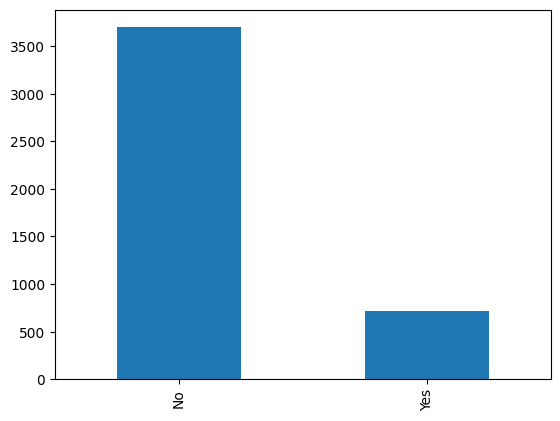

In [441]:
# Identificación de ejemplos de entrenamiento por clases
y['Attrition'].value_counts().plot(kind='bar')

**Análisis**

*  Se puede observar que la mayoria de los empleados no han abandonado su empleo el año anterior (posible desbalance en los datos) 

In [442]:
# LabelEncoder del target
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y, columns = ['Attrition'])
print(y.value_counts(), y.shape)


Attrition
0            3699
1             711
dtype: int64 (4410, 1)


Teniendo encuenta que el valor de los datos es 4410, 3699 son 'No' y 711 'yes', se procede a comprobar cuanto es el total de los que han renunciado el año anterior

In [443]:
porcentaje_y =  int(y[y["Attrition" ]==1].sum())/y["Attrition"].size
print(str(round(porcentaje_y*100)) + "%")

16%


**Se obtiene que en promedio el 16% de los empleados han renunciado a su trabajo el año anterior**

###COLUMNAS OBJECT

In [444]:
#COLUMNAS OBJECT
X_object=X.select_dtypes(include=['object'])
# X_object

In [445]:
#analisis de categorias dentro de las variables
print("Categorias de BusinessTravel: ", X["BusinessTravel"].unique(), '\n\n')
print("Categorias de Department: ", X["Department"].unique(), '\n\n')
print("Categorias de EducationField: ", X["EducationField"].unique(),'\n\n')
print("Categorias de Gender: ", X["Gender"].unique(), '\n\n')
print("Categorias de JobRole: ", X["JobRole"].unique(), '\n\n')
print("Categorias de MaritalStatus: ", X["MaritalStatus"].unique(), '\n\n')
print("Categorias de Over18: ", X["Over18"].unique())
#todas la categorias se encuentan correctas, ninguna se repite o tiene algun error tipografico

Categorias de BusinessTravel:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 


Categorias de Department:  ['Sales' 'Research & Development' 'Human Resources'] 


Categorias de EducationField:  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 


Categorias de Gender:  ['Female' 'Male'] 


Categorias de JobRole:  ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager'] 


Categorias de MaritalStatus:  ['Married' 'Single' 'Divorced'] 


Categorias de Over18:  ['Y']


In [446]:
X_object.drop("Over18", axis = 1, inplace = True)#cuidado al ejectar dos veces, saca error si ya se elimino 1 vez
# X_object

Se elimina la variable "Over18", ya que solo tiene 1 valor y no aportaría al modelo

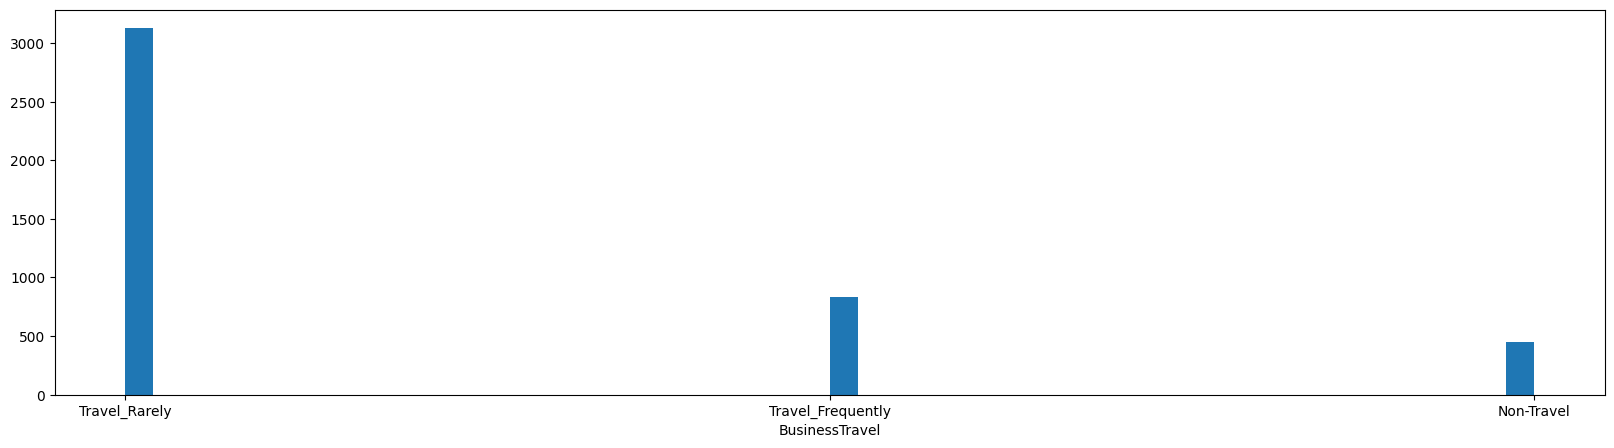

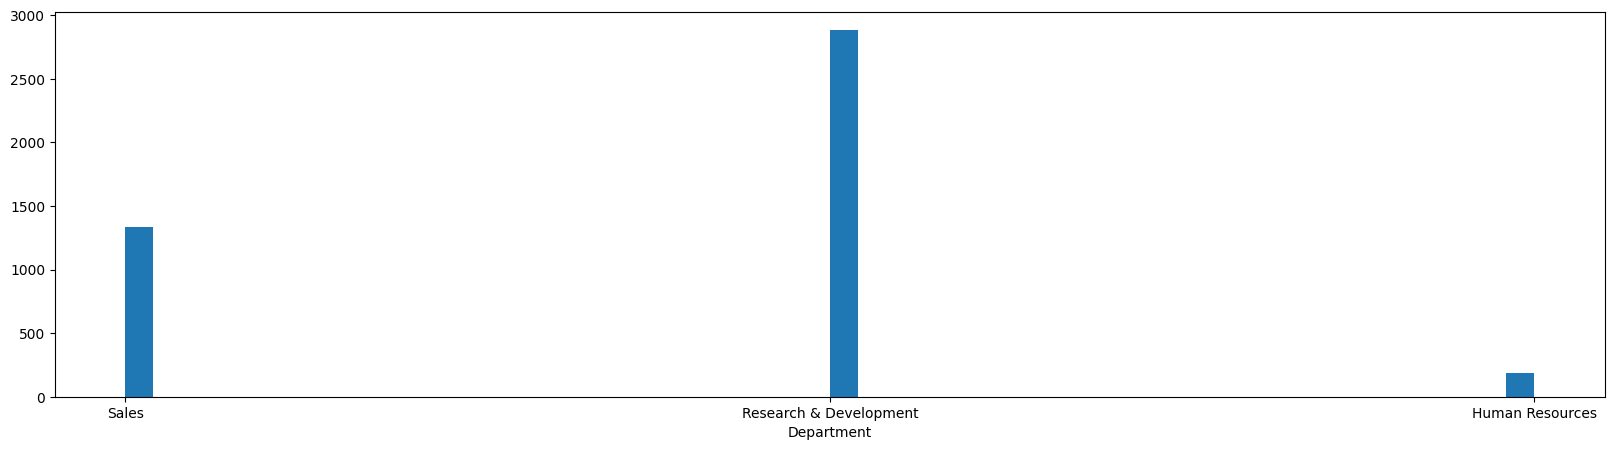

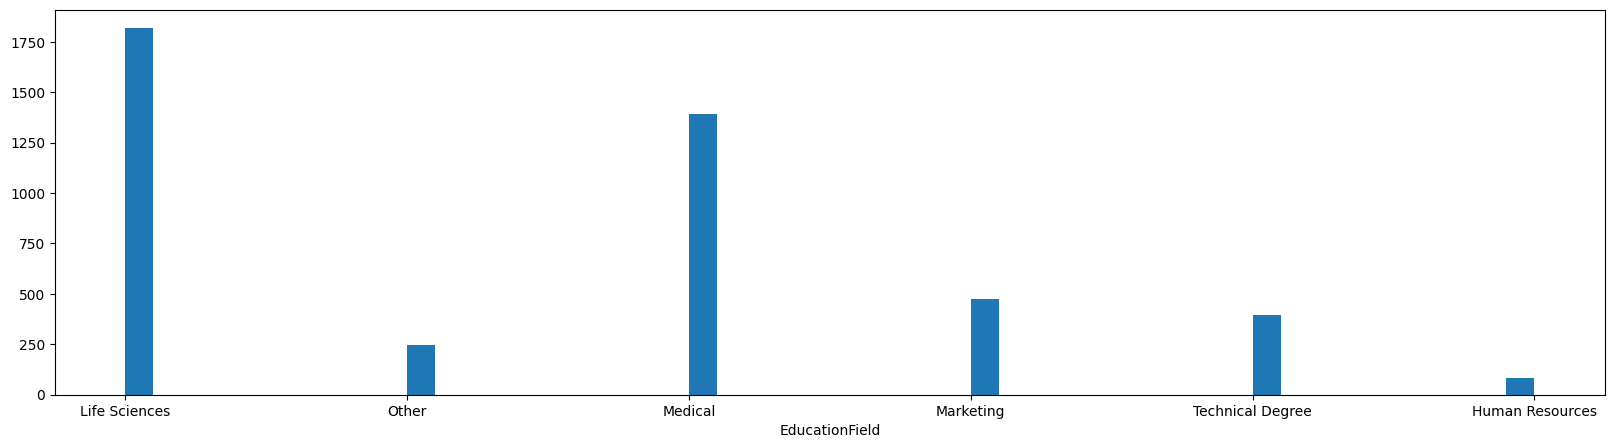

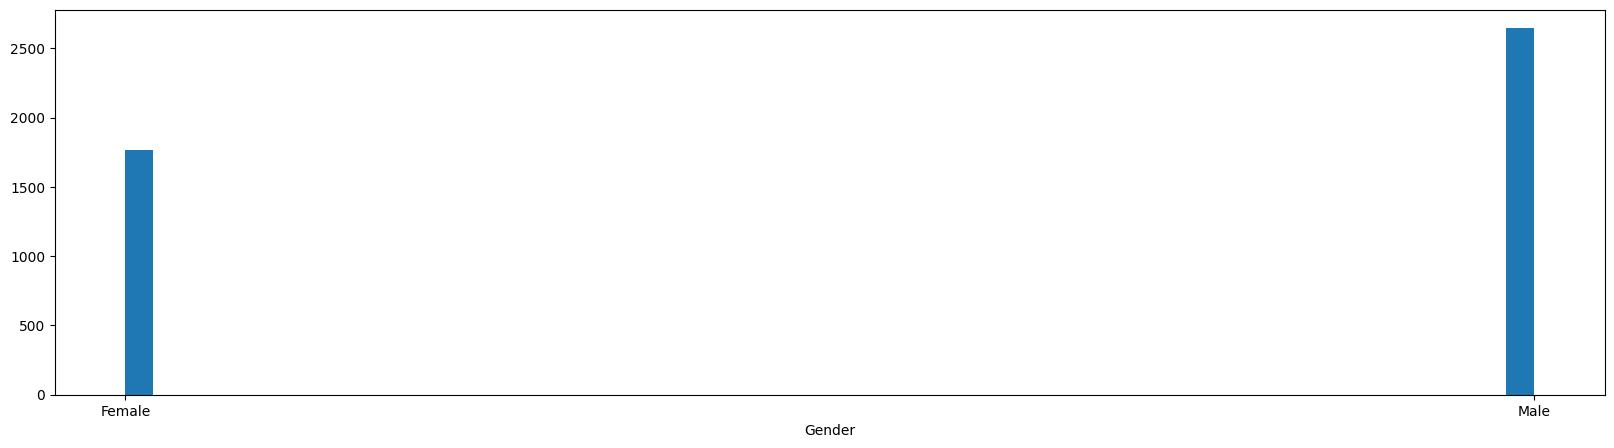

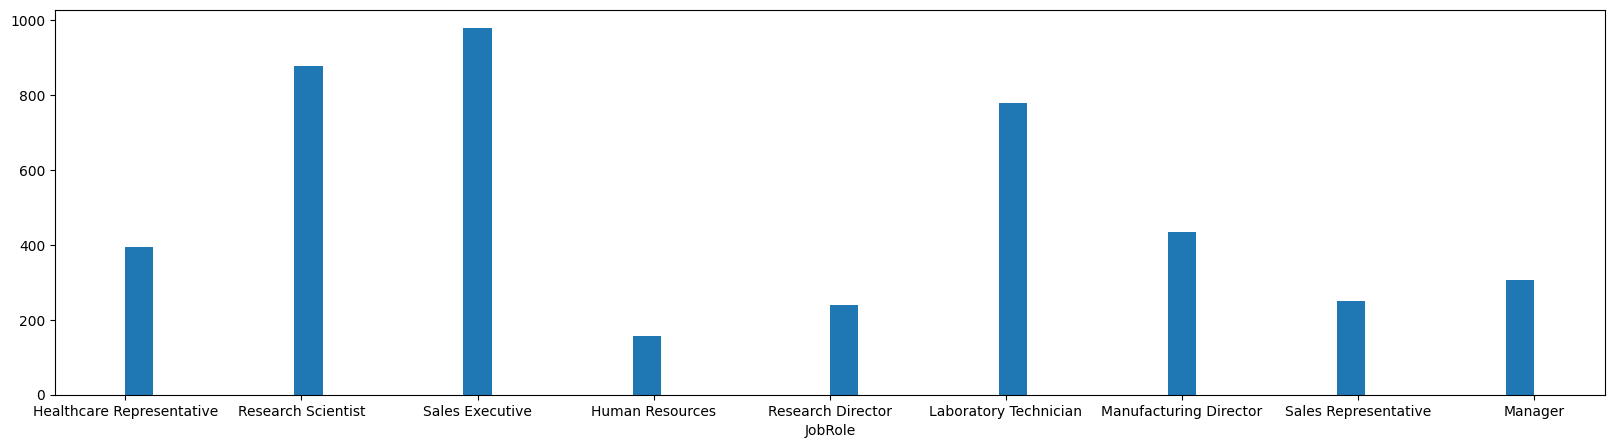

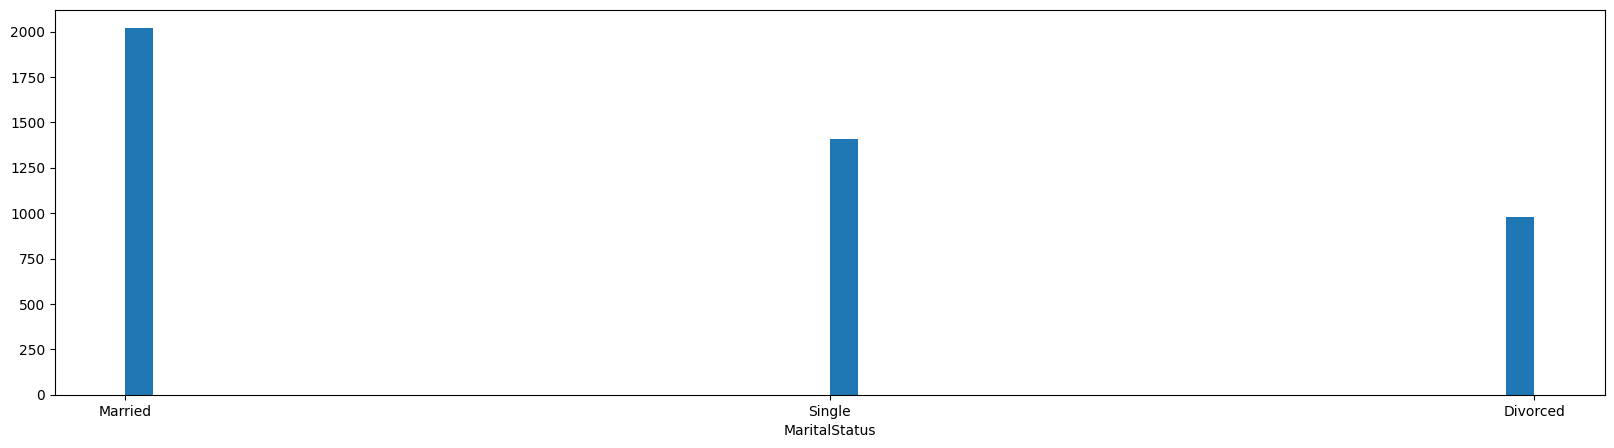

In [447]:
for variable in X_object:
  plt.figure(figsize=(20, 5))
  plt.hist(X_object[variable],50)
  plt.xlabel(variable)

**Análisis**

* BussinessTravel: de este histograma, podemos observar que la mayoría de datos se encuentran en que los empleados viajan rara vez, seguido de viajan ocasionalmente y por último no viaja.

* Department: de esta variable podemos decir que la mayoría de sus empleados se encuentran en el departamento de investigación y desarrollo, seguido del departamento de ventas y por último el departamento de recursos humanos.

* EducationField: en estos datos podemos observar que la mayoria de empleados son de ciencias bilógicas, seguido por medicina, marketing, estudios ténicos, otros y por último recursos humanos.

* Gender: De esta podemps observar que la mayoría de los empleados son hombres.

* JobRole: De esta podemos observar que la mayoría empleados están concentrados en ejecutivos de ventas, investigador cientifico y técnico de laboratorio.

* MaritalStatus: En este histograma se observa que la mayotía de empleados son casados, seguidos de solteros y por último divorciados. 

In [448]:
#hacemos un get_dummies, codificamos las variables categoricas 
X_object_t=pd.get_dummies(X_object)
# X_object_t

###COLUMNAS NUMERICAS ENTERAS

In [449]:
#COLUMNAS NUMERICAS ENTERAS
X_int=X.select_dtypes(include=['int64'])
# X_int

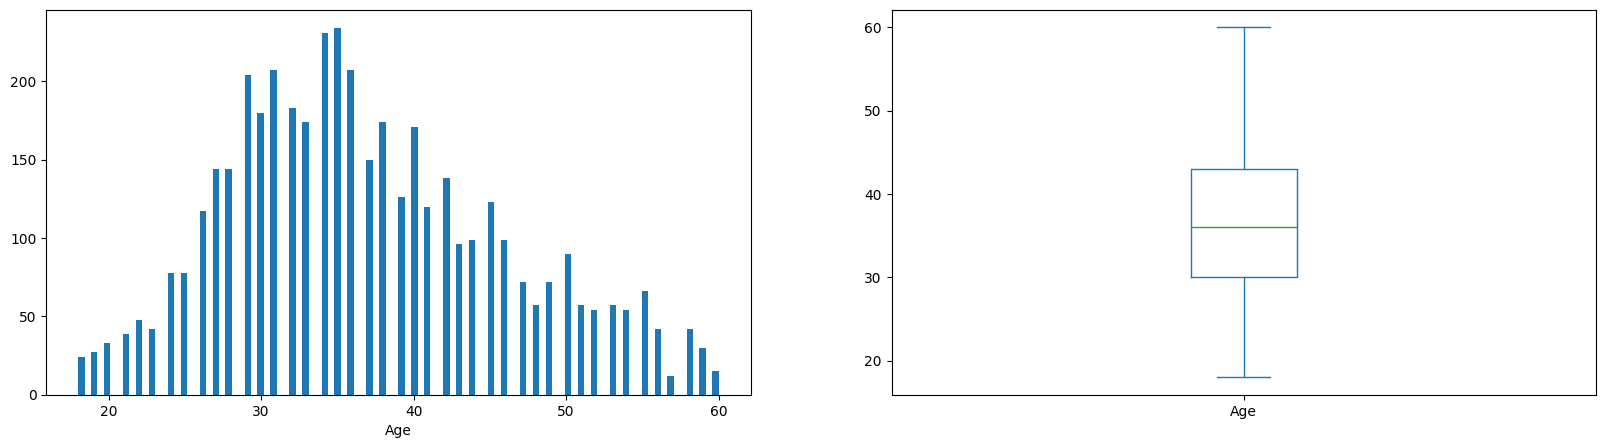

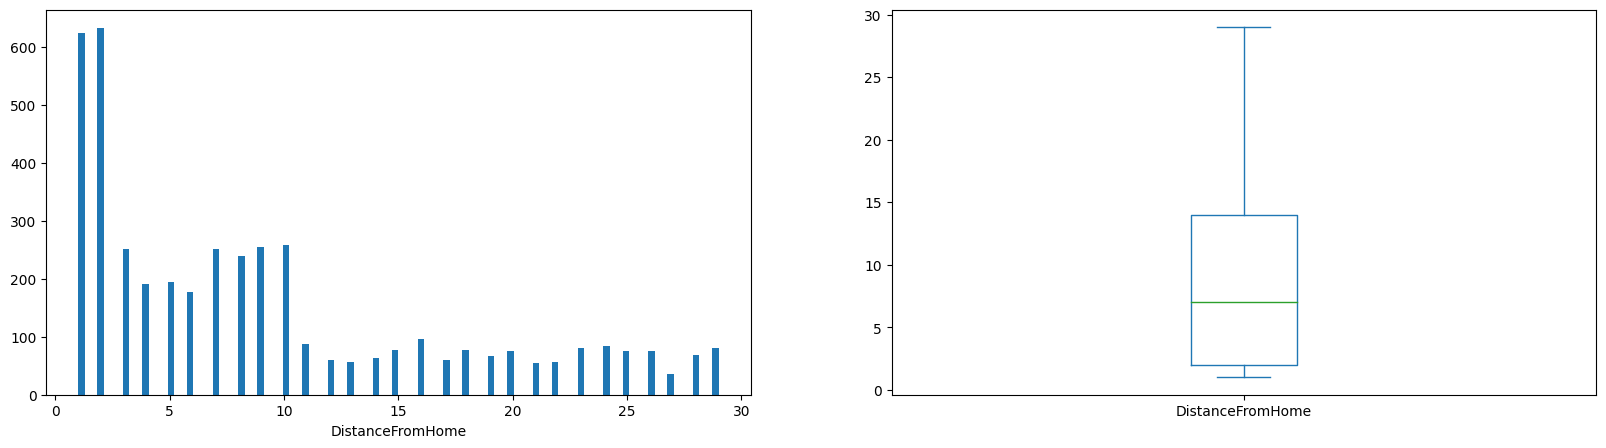

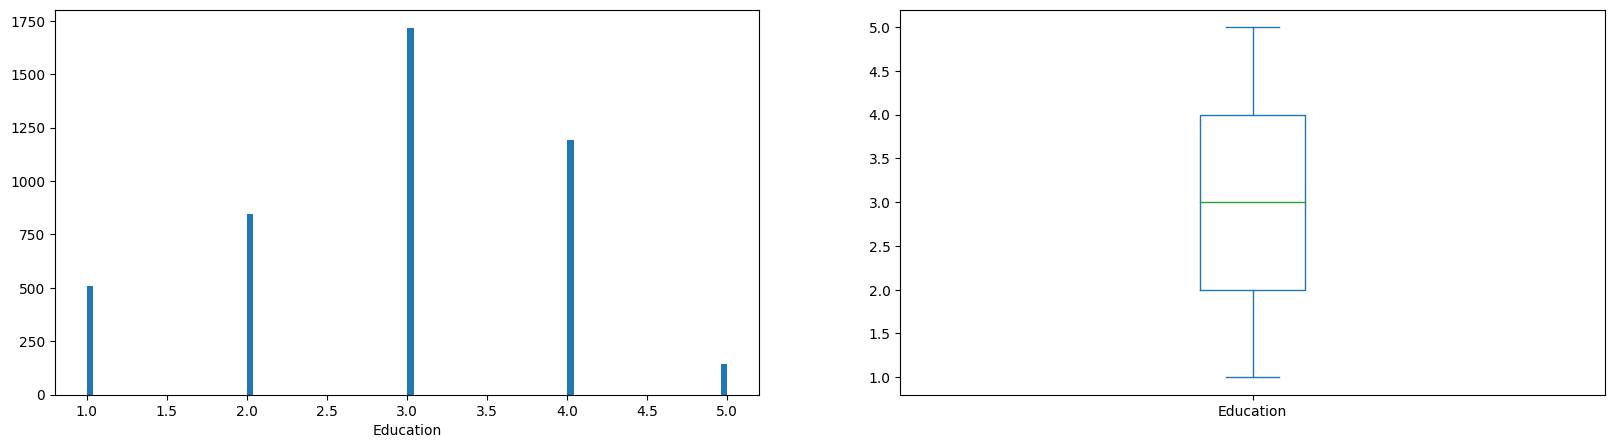

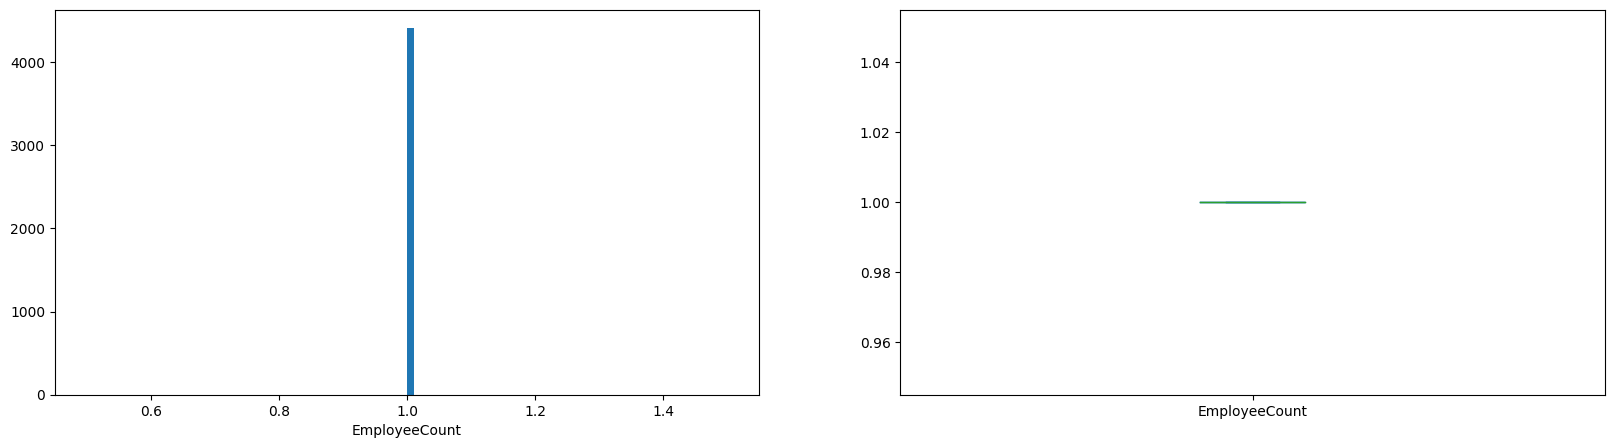

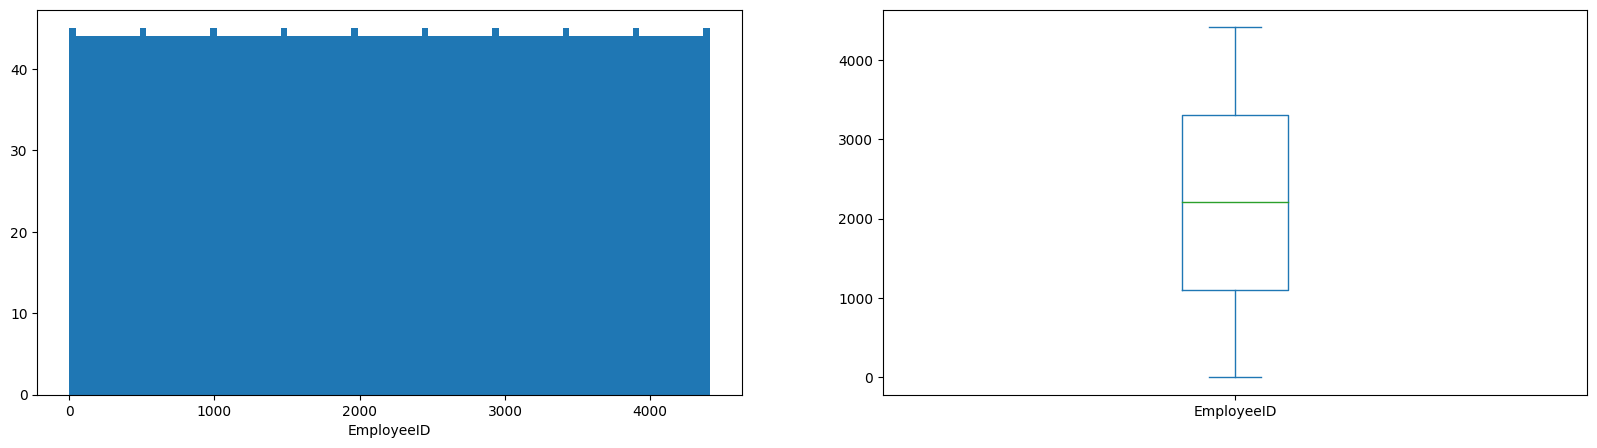

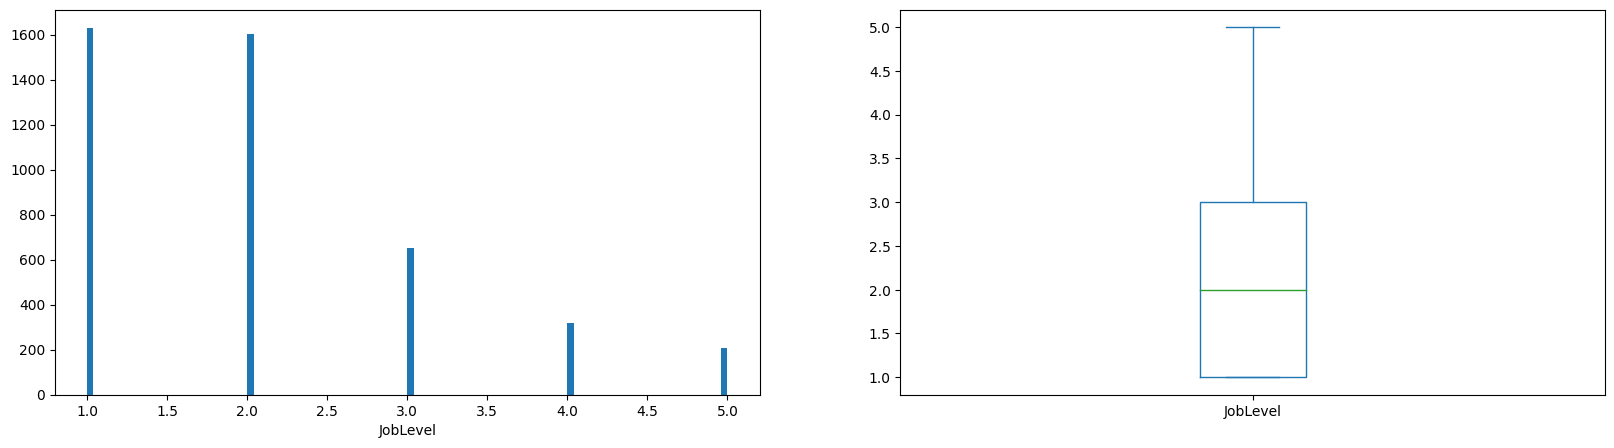

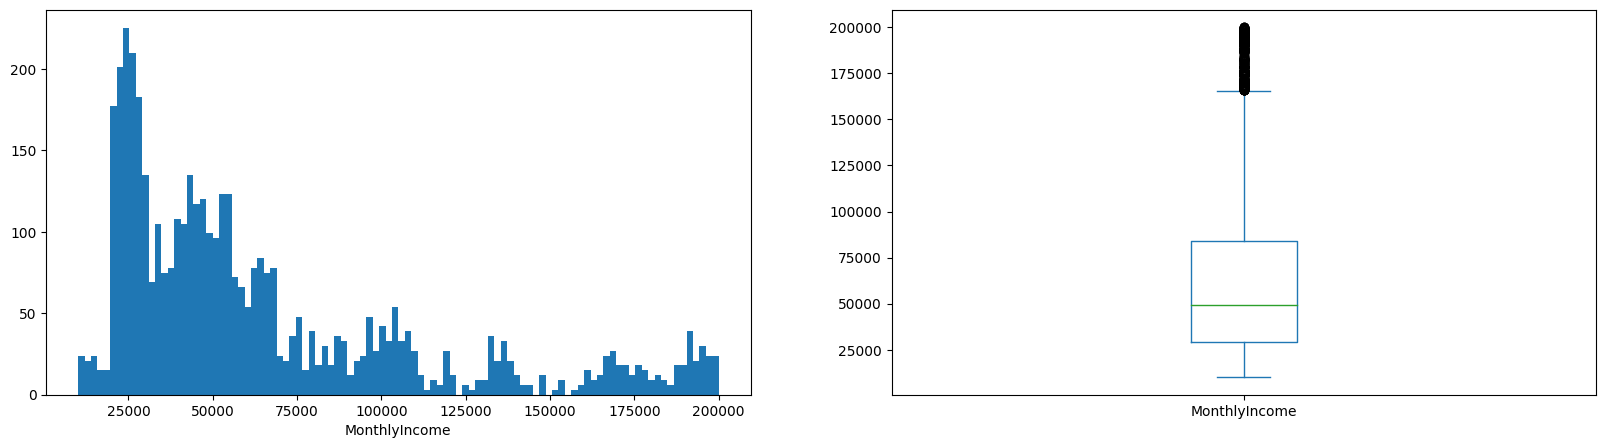

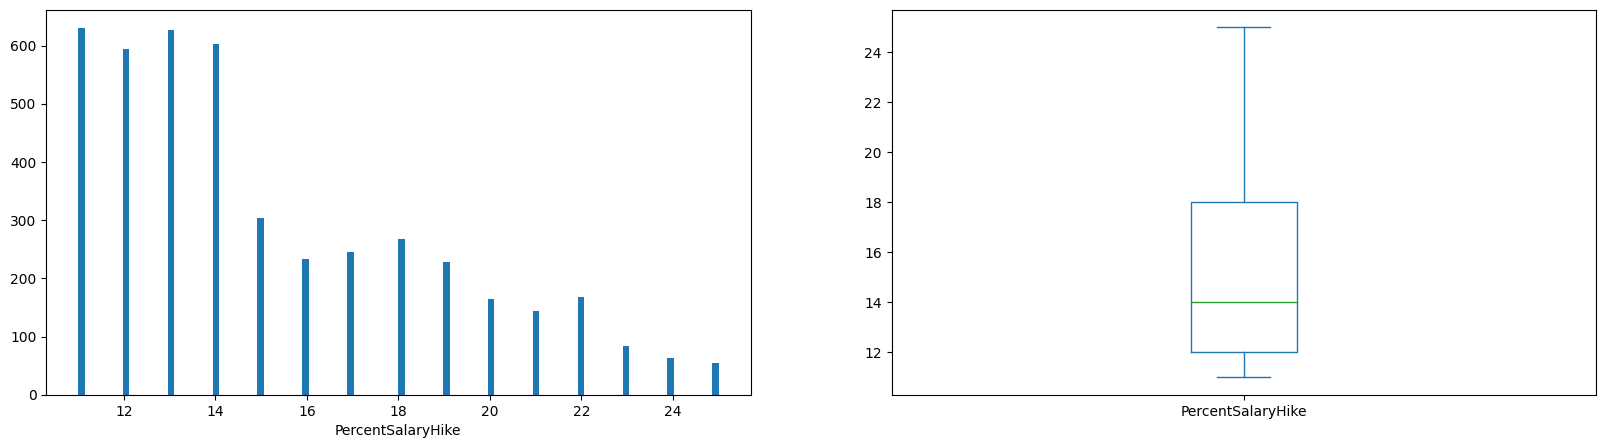

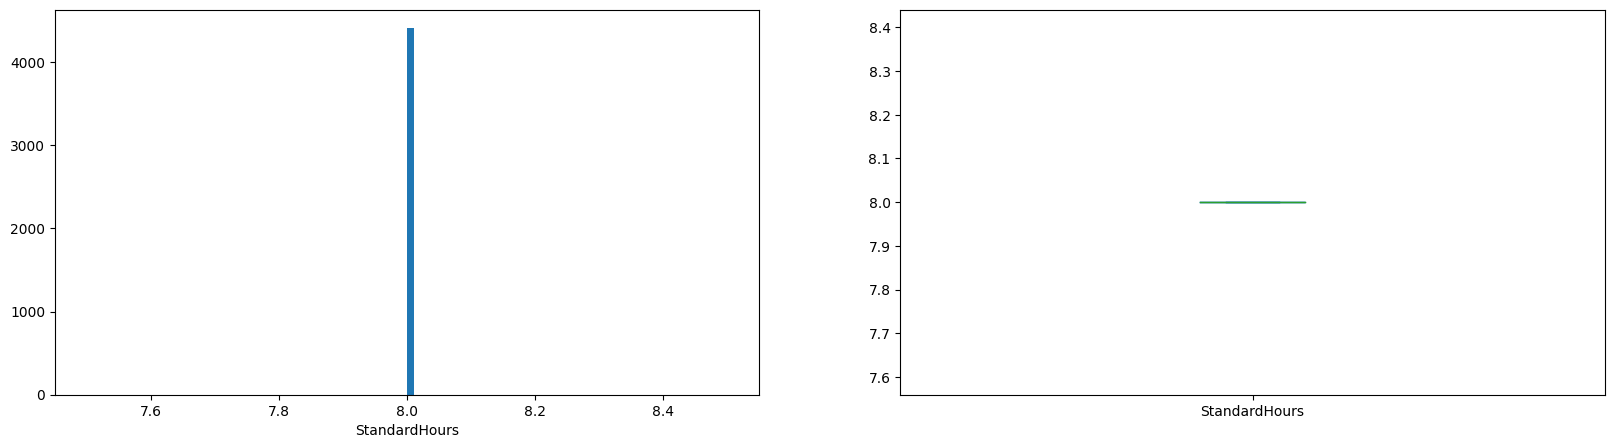

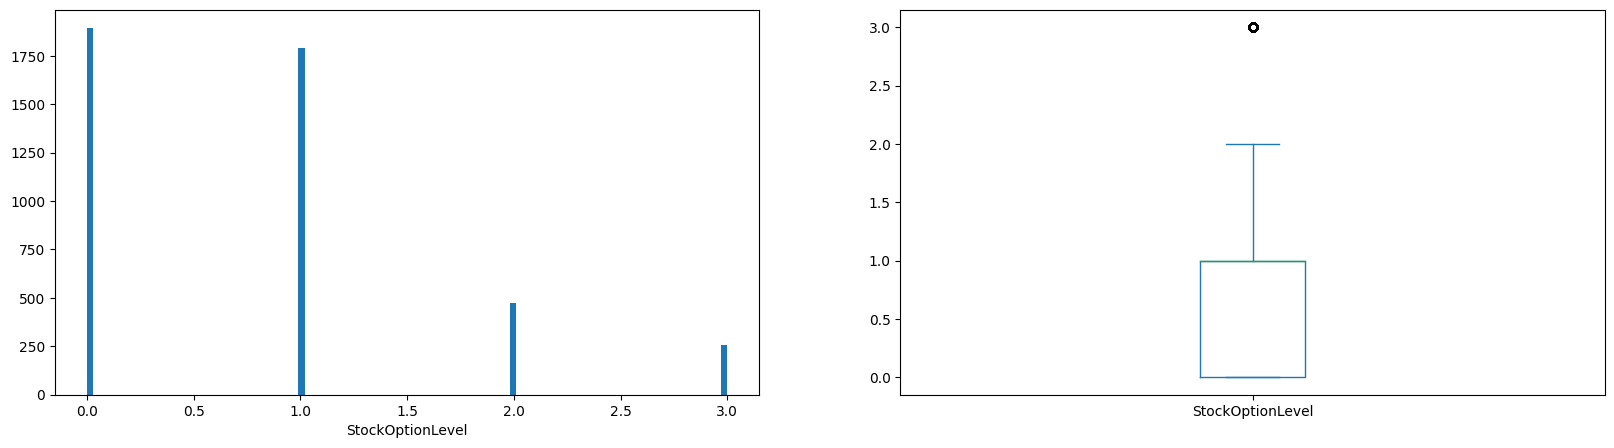

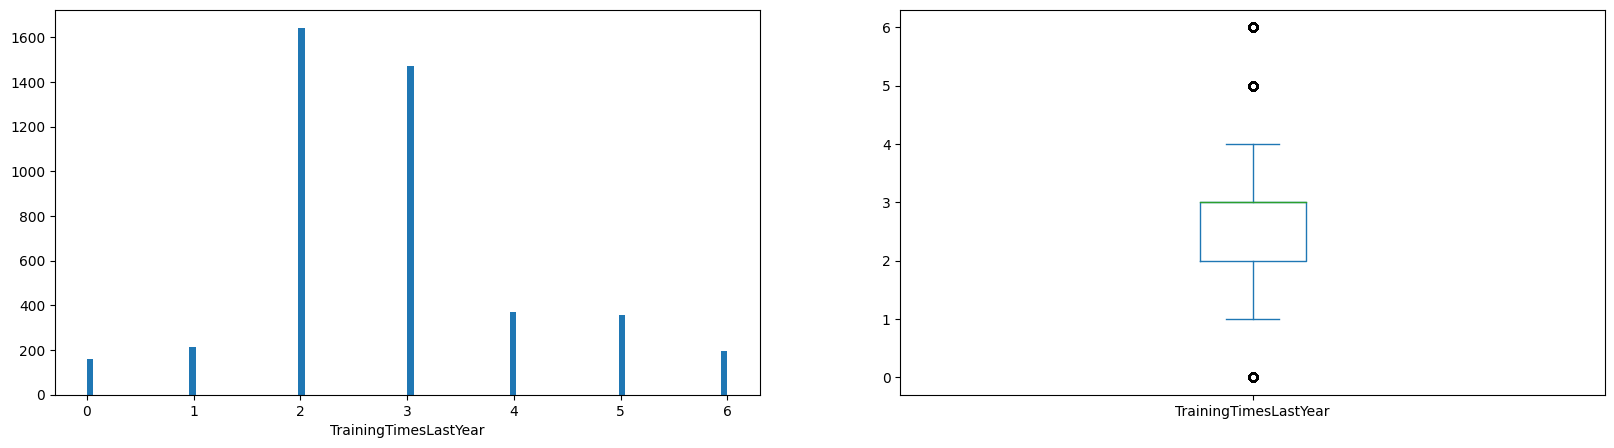

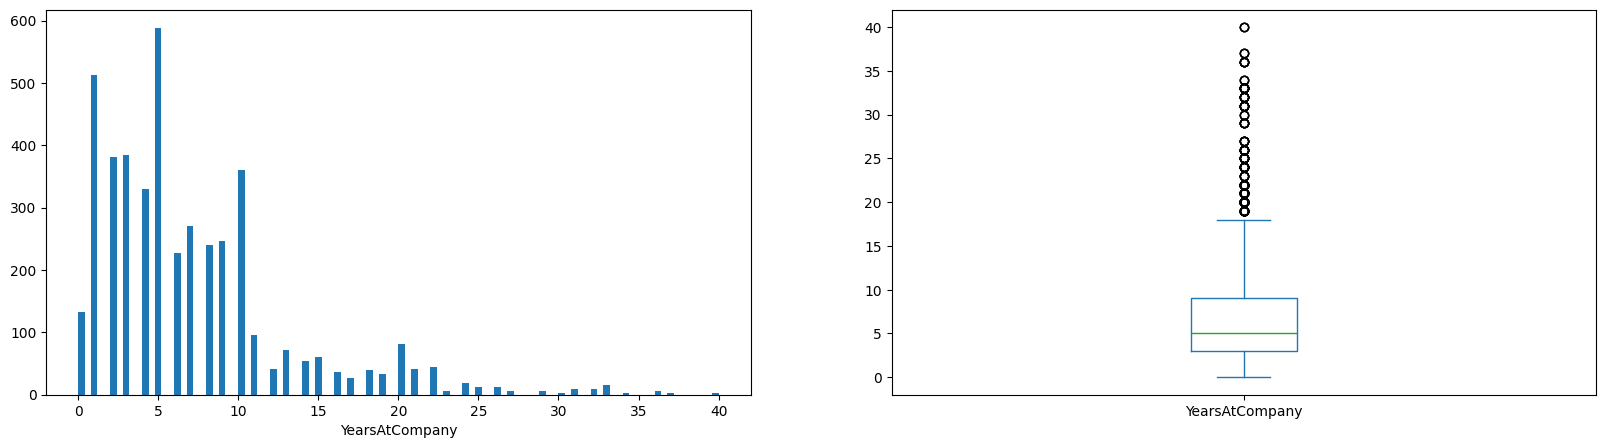

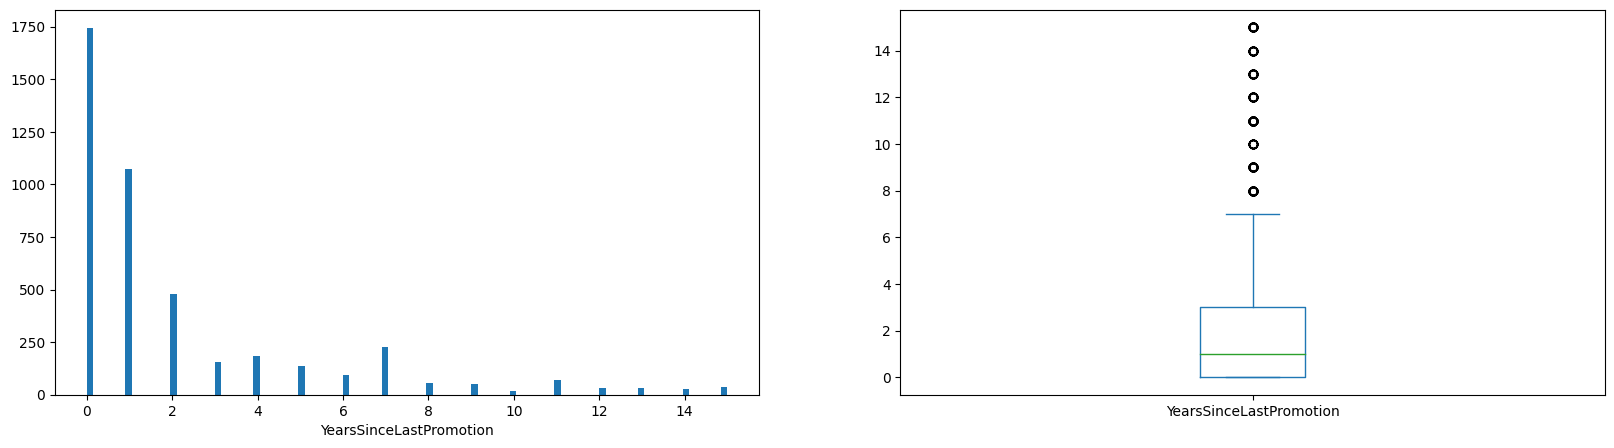

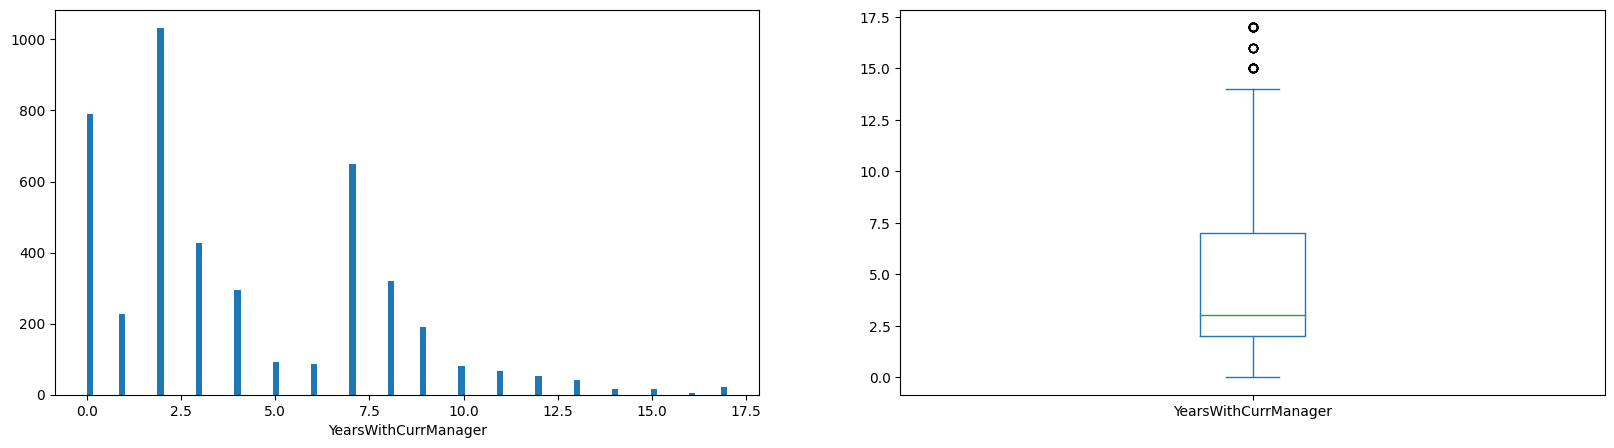

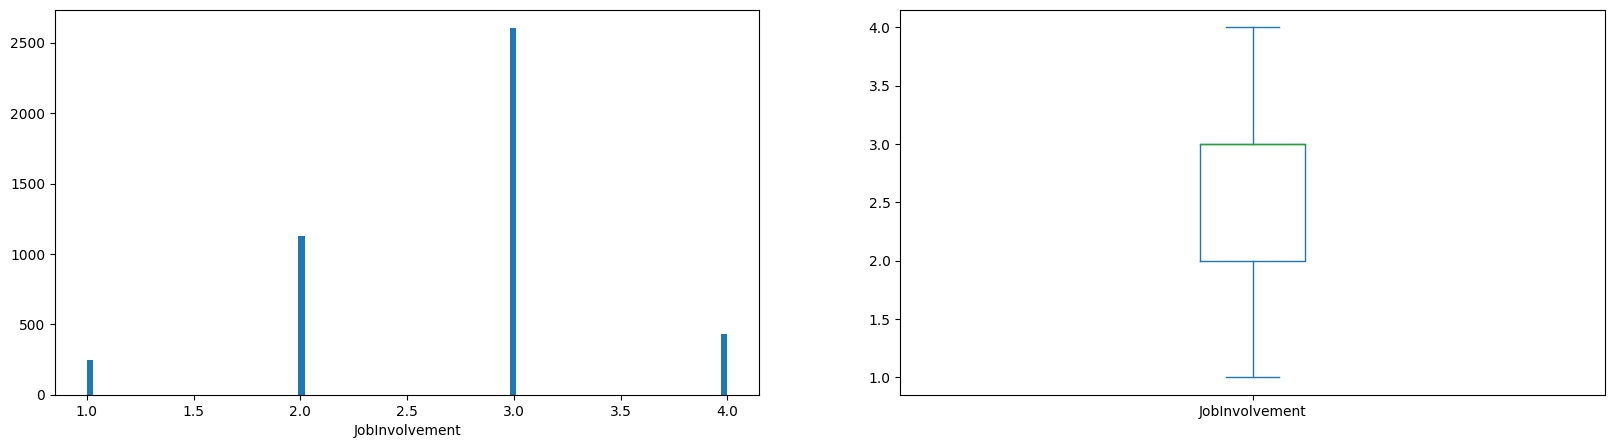

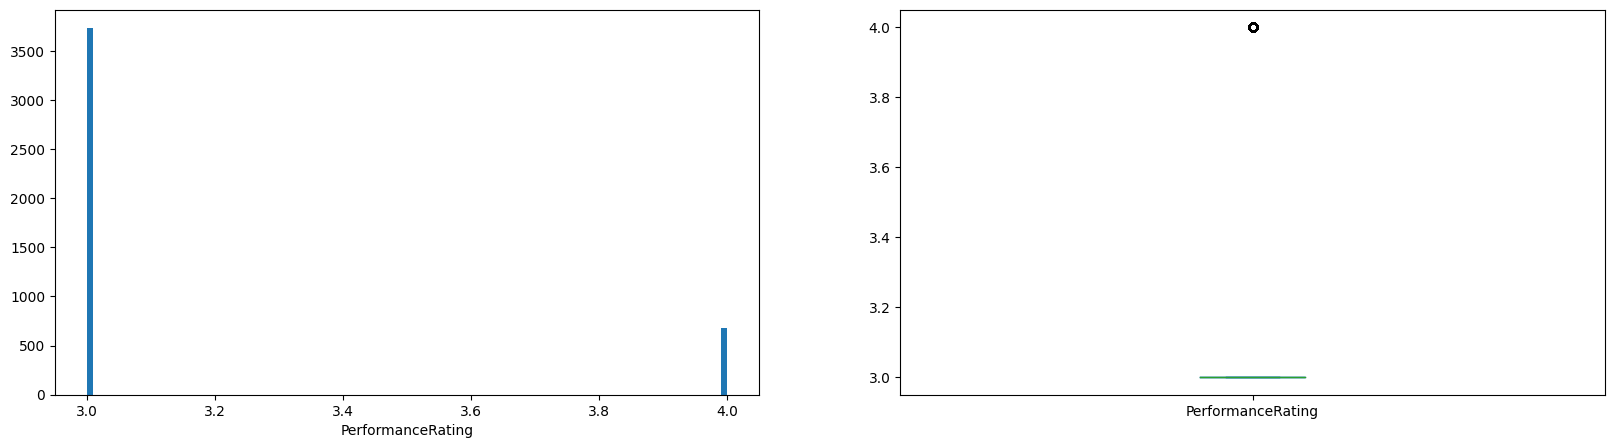

In [450]:
for variable in X_int:
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_int[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_int[variable].plot(kind='box')
  # plt.title('Boxplot - target (mpg)')

**Análisis**

* Age: Se puede observar que la mayoría de empleados rondan en una endad entre los 30 y 40 años. De igual manera, revisando el histograma se puede apreciar un sesgo de los datos hacia la izquierda y, mirando el boxplot se puede apreciar que no hay datos atípicos.

* DistanceFromHome: Se puede observar que la mayoría de empleados se encuentran a una distancia entre 1 km y 10 km del trabajo a la casa, lo cual quiere decir que la mayoría de datos están sesgados hacia la izquierda. Este mismo comportamineto se puede observar en el boxplot, el cua también nos muestra que no hay datos atipicos.

* Education: En estos datos se oberva que la mayoría de empleados tienen un titulo de licenciado, master y universitario en ese respectivo orden.

* EmployeeCount y EmployeeID: Estas dos variables se eliminan debido a que no sirven para el análisis o descripción de la variable objetivo.

* Joblevel: Del histograma podemos concluir que la mayoría de los datos están representandos por el nivel de puesto 1 y 2 (un sesgo hacia la izquierda). Del boxplot se puede ver que entre el cuartil 1 y 2 casi no hay variación de los datos, esto quizá se da porque el 50% de los datos están representados es dos categorías.

* MonthlyIncome: Según el histograma, la mayoría de empleados reciben un salario entre los 25000 y 70000 dolares mensuales (sesgo hacia la izquierda). Del boxplot, podemos decir que el tercer y cuarto cuartil presentan la mayor variación de los datos y, además, se presenta una gran variedad de datos atípicos 1.5 veces por encima del rango intercuartil.

* PercentSalaryHike: Del histograma podemos decir que el porcentaje de aumento del salario anual, se encuentran por debajo del 14%, este comportamiento también se puede observar en el boxplot, donde el primer y segundo cuartil tienen una pequeña variación en los datos, caso contrario al tercer y cuarto cuartil donde se presenta una gran variación de los datos. 

* StandardHours: Esta variable se elimina debido a que no aporta al estudio de la variable objetivo. Esta variable no presenta variación, es constante todo el tiempo (8 horas al día).

* StockOptionLevel: Del histograma y del boxplot podemos analizar que la mayoría de los empleados reciben uno o cero opciones sobre acciones del empleado.

* TrainingTimeLastYear: Del histograma se puede evidenciar que la mayoría de veces que se le impartió formación a el empleado el año pasado, fue de dos y tres veces.

* YearsAtCompany: En el histograma se evidencia que la mayoría de los empleados durante entre 1 y 10 años. Del histograma, se puede decir que no hay mucha variación de los datos y que los datos atípicos que se presentan, muestra que pocos empleados duran 20 años o más en la compañía.

* YearsSinceLastPromotion: De la información brindada por el histograma, se puede decir que la mayoría de los empleados reciben un ascenso en un tiempo de cero a dos años.

* YearsWithCurrManager: Del histograma podemos interpretar que se presentan tres grandes patrones, los cuales son 0, 2 y 7 años, donde 2 es la mayoría de años donde una persona está bajo el mando de una misma persona, seguido de cero y siete años.


* JobInvolvement: De los graficos se puede interpretar que la mayoría de los empleados presentan una implicación de 3 (alta), seguido de una implicación en el trabajo de 2 (media). 

* PerformanceRating: En la la valoración del rendimiento en el último año, la mayoría de empleados presentan una valoración de 3 (excelente), seguido de una valoración de 4 (sobresaliente) 


In [451]:
##De los histogramas se observa que las siguientes variables no aportan al modelo:
#EmployeeCount= es un valor unico
print("Categorias de EmployeeCount: ", X_int["EmployeeCount"].unique())
#EmployeeID= es un valor de id del empleado, no refleja ningun comportamiento del modelo
#StandardHours= es un solo valor, todos los empleados trabajan 8 horas
print("Categorias de StandardHours: ", X_int["StandardHours"].unique())

##De los histogramas se observa que las siguientes variables se comportan como variables categoricas, por tanto se deben codificar y posteriormente agregar a la base de categoricas. 
t=pd.concat([X_int["StockOptionLevel"],X_int["PerformanceRating"],X_int["JobInvolvement"],X_int["JobLevel"],X_int["Education"],X_int["TrainingTimesLastYear"]],axis=1)
t=t.astype(str)
t=pd.get_dummies(t)
X_object_t=pd.concat([X_object_t, t], axis=1)
#veamos las categorias de estas variables
print("Categorias de StockOptionLevel: ", X_int["StockOptionLevel"].unique())
print("Categorias de PerformanceRating: ", X_int["PerformanceRating"].unique())
print("Categorias de JobInvolvement: ", X_int["JobInvolvement"].unique())
print("Categorias de JobLevel: ", X_int["JobLevel"].unique())
print("Categorias de Education: ", X_int["Education"].unique())
print("Categorias de TrainingTimesLastYear: ", X_int["TrainingTimesLastYear"].unique())


#Se eliminan las variables que no aportan y las que se pasaron a categoricas
X_int.drop(["EmployeeCount","StandardHours","EmployeeID","StockOptionLevel","PerformanceRating","JobInvolvement","JobLevel","Education","TrainingTimesLastYear"], axis = 1, inplace = True)
##El resto de variables se pasan a float para su manejo posterior en el modelo y se incluyen en el database X_float mas adelante.
X_int=X_int.astype(float)
X_int.head()

Categorias de EmployeeCount:  [1]
Categorias de StandardHours:  [8]
Categorias de StockOptionLevel:  [0 1 3 2]
Categorias de PerformanceRating:  [3 4]
Categorias de JobInvolvement:  [3 2 1 4]
Categorias de JobLevel:  [1 4 3 2 5]
Categorias de Education:  [2 1 4 5 3]
Categorias de TrainingTimesLastYear:  [6 3 2 5 4 0 1]


,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51.0,6.0,131160.0,11.0,1.0,0.0,0.0
1,31.0,10.0,41890.0,23.0,5.0,1.0,4.0
2,32.0,17.0,193280.0,15.0,5.0,0.0,3.0
3,38.0,2.0,83210.0,11.0,8.0,7.0,5.0
4,32.0,10.0,23420.0,12.0,6.0,0.0,4.0


###COLUMNAS NUMERICAS FLOAT

In [452]:
#COLUMNAS NUMERICAS FLOAT
X_float = X.select_dtypes(include=['float64'])
X_float

,NumCompaniesWorked,TotalWorkingYears,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
0,1.0,1.0,3.0,4.0,2.0,6.8702
1,0.0,6.0,3.0,2.0,4.0,7.3160
2,1.0,5.0,2.0,2.0,1.0,6.8161
3,3.0,13.0,4.0,4.0,3.0,6.7892
4,4.0,9.0,4.0,1.0,3.0,7.8776
...,...,...,...,...,...,...
4405,3.0,10.0,4.0,1.0,3.0,8.3169
4406,2.0,10.0,4.0,4.0,3.0,5.8972
4407,0.0,5.0,1.0,3.0,3.0,7.1495
4408,0.0,10.0,4.0,1.0,3.0,9.1876


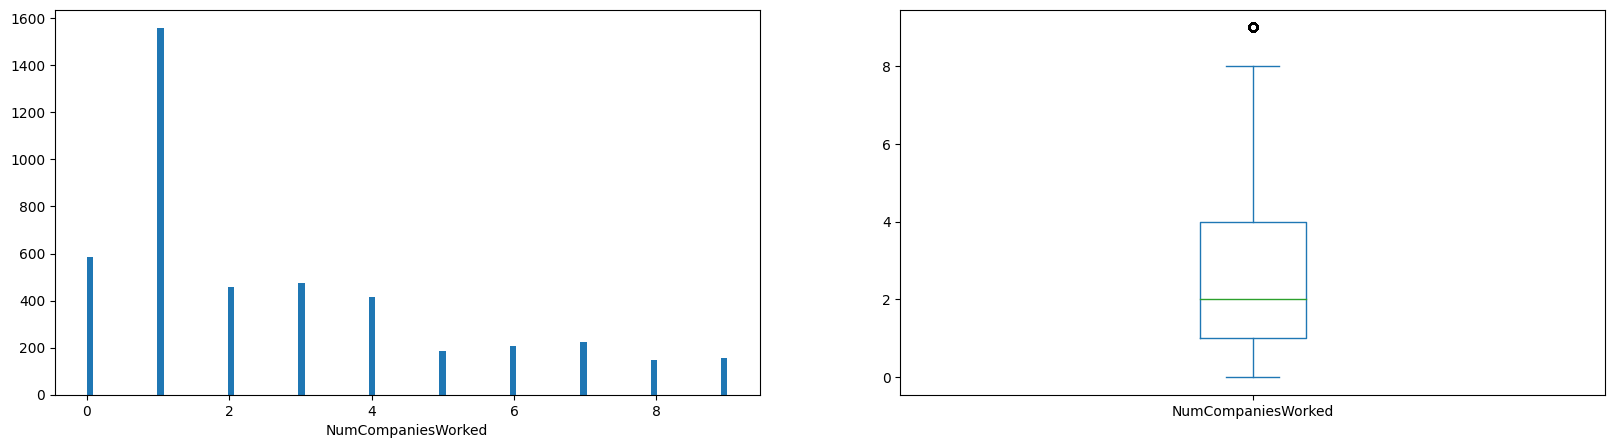

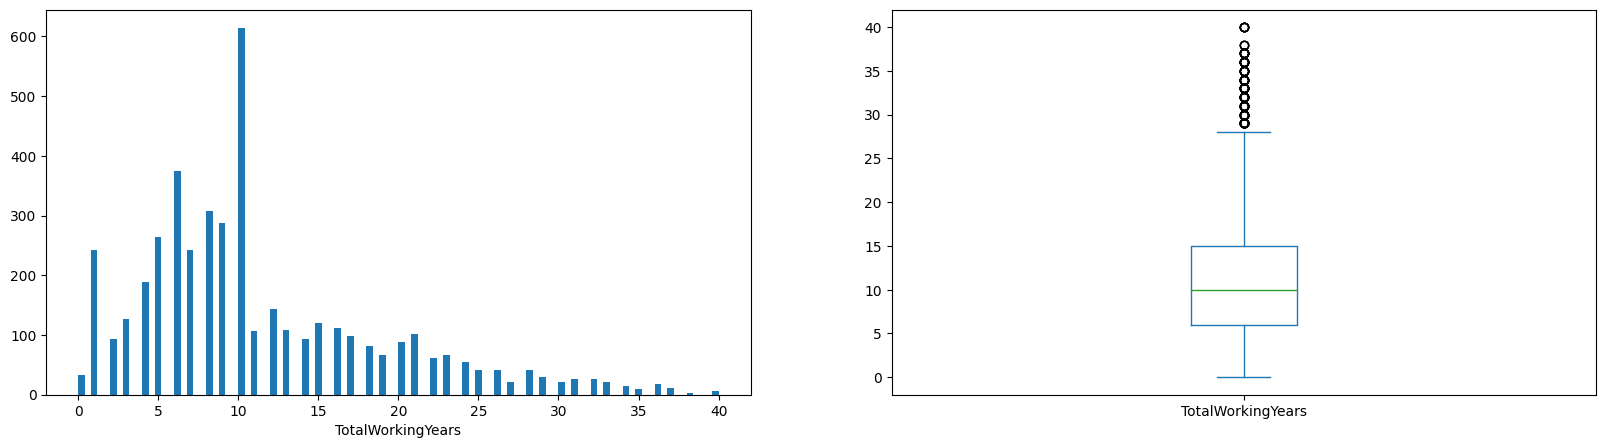

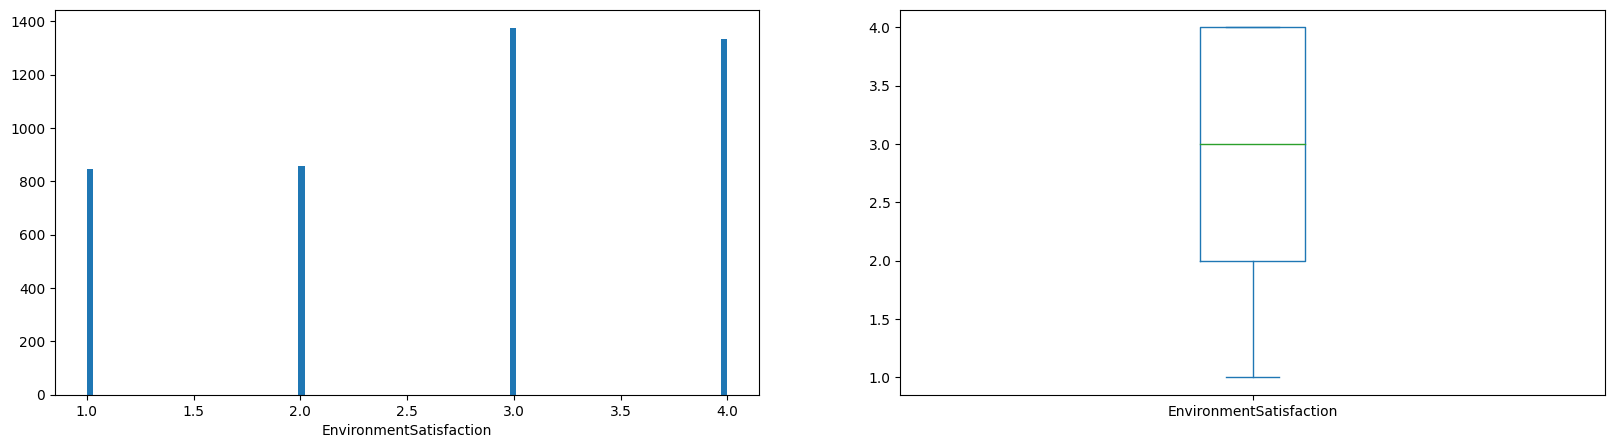

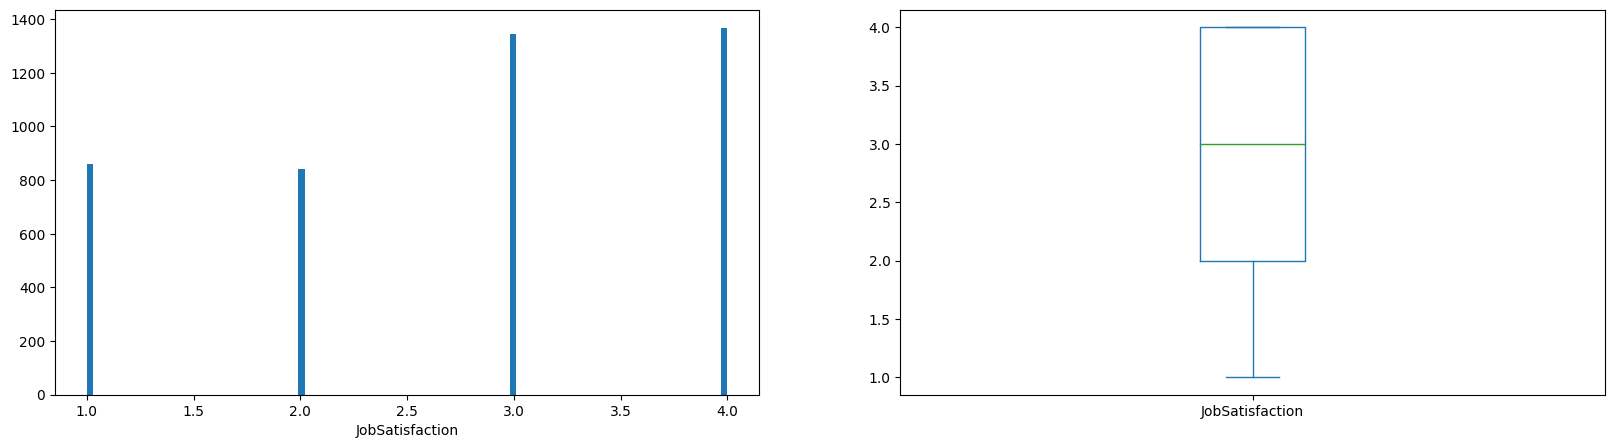

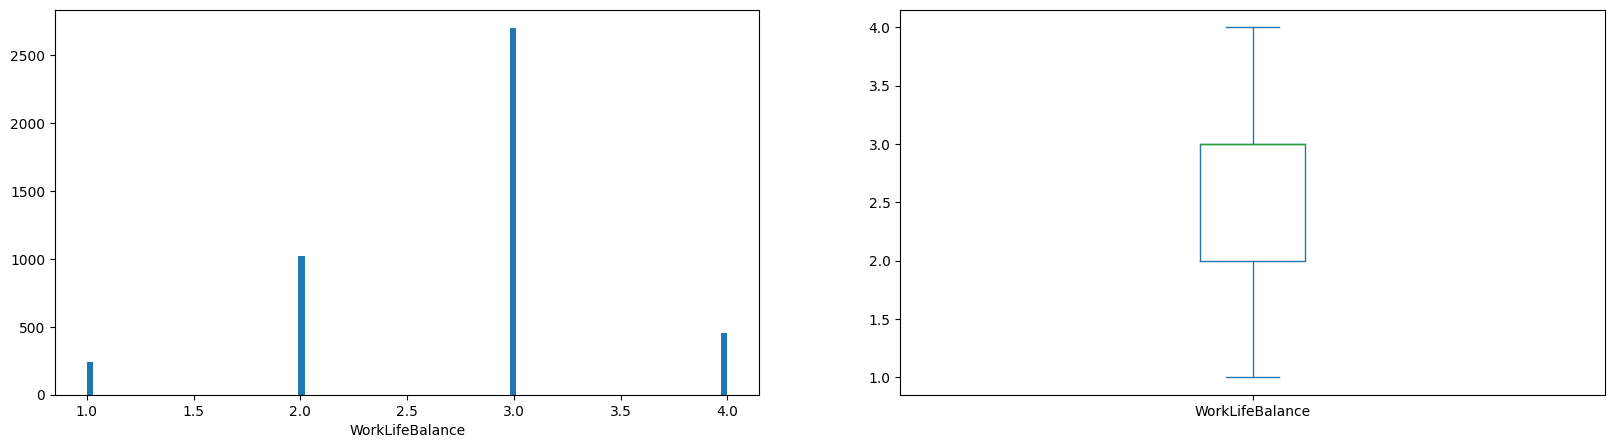

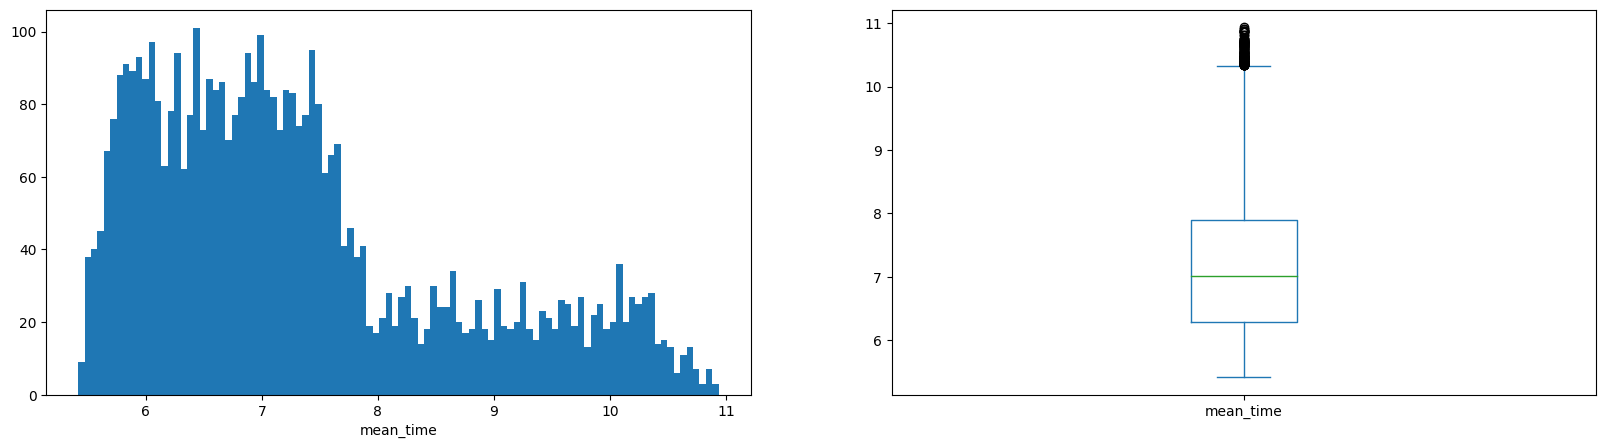

In [453]:
for variable in X_float:
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_float[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_float[variable].plot(kind='box')
  # plt.title('Boxplot - target (mpg)')

**Análisis**

* NumComapinesWorked: De los gráficos de esra variable, se puede observar que hay un gran número de empleados que sólo han trabajado en una empresa. Llama la atención el que haya un cierto número de empleados que no ha tabajado en ninguna empresa. 

* TotalWorkingYears: De los gráficos, se puede análizar que hay un gran número de empleados que ha trabajado diez y menos años. Son pocos los que han trabajado más de diez años.

* EnviromentSatisfaction: De los gráficos, se observa que gran parte de los empleados tienen un nivel de satisfación del entorno de trabajo alto y muy alto.

* JobSatisfaction: Respecto al nive de satisfaccion laboral, los datos muestran que la mayoría de los empleados se encuentran en un nivel alto y muy alto de satisfacción.

* WorkLifeBalance: En los graficos se evidencia que hay un gran número de empleados que que tienen un nivel de cociliación de la vida laboral y familiar muy buena, seguido de buena y la mejor. 

* Mean_time: los gráficos muestran que el tiempo promedio de dedicación del empleado al día es mayoritariamente de 6 a 8 horas.

In [454]:
##De los histogramas se observa que las siguientes variables se comportan como variables categoricas, por tanto se deben codificar 
# y posteriormente agregar a la base de categoricas. 
tt=pd.concat([X_float["EnvironmentSatisfaction"],X_float["JobSatisfaction"],X_float["WorkLifeBalance"]],axis=1)
tt=tt.astype(str)
tt=pd.get_dummies(tt)
X_object_t=pd.concat([X_object_t, tt], axis=1)

#Se eliminan las variables que se pasaron a categoricas
X_float.drop(["EnvironmentSatisfaction","JobSatisfaction","WorkLifeBalance"], axis = 1, inplace = True)
X_float.head()

,NumCompaniesWorked,TotalWorkingYears,mean_time
0,1.0,1.0,6.8702
1,0.0,6.0,7.3160
2,1.0,5.0,6.8161
3,3.0,13.0,6.7892
4,4.0,9.0,7.8776


##CORRELACIÓN DE VARIABLES NUMERICAS

In [455]:
X_corr = pd.concat([X_int, X_float], axis=1)
X_corr

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked,TotalWorkingYears,mean_time
0,51.0,6.0,131160.0,11.0,1.0,0.0,0.0,1.0,1.0,6.8702
1,31.0,10.0,41890.0,23.0,5.0,1.0,4.0,0.0,6.0,7.3160
2,32.0,17.0,193280.0,15.0,5.0,0.0,3.0,1.0,5.0,6.8161
3,38.0,2.0,83210.0,11.0,8.0,7.0,5.0,3.0,13.0,6.7892
4,32.0,10.0,23420.0,12.0,6.0,0.0,4.0,4.0,9.0,7.8776
...,...,...,...,...,...,...,...,...,...,...
4405,42.0,5.0,60290.0,17.0,3.0,0.0,2.0,3.0,10.0,8.3169
4406,29.0,2.0,26790.0,15.0,3.0,0.0,2.0,2.0,10.0,5.8972
4407,25.0,25.0,37020.0,20.0,4.0,1.0,2.0,0.0,5.0,7.1495
4408,42.0,18.0,23980.0,14.0,9.0,7.0,8.0,0.0,10.0,9.1876


Text(0.5, 1.0, 'Correlación entre variables')

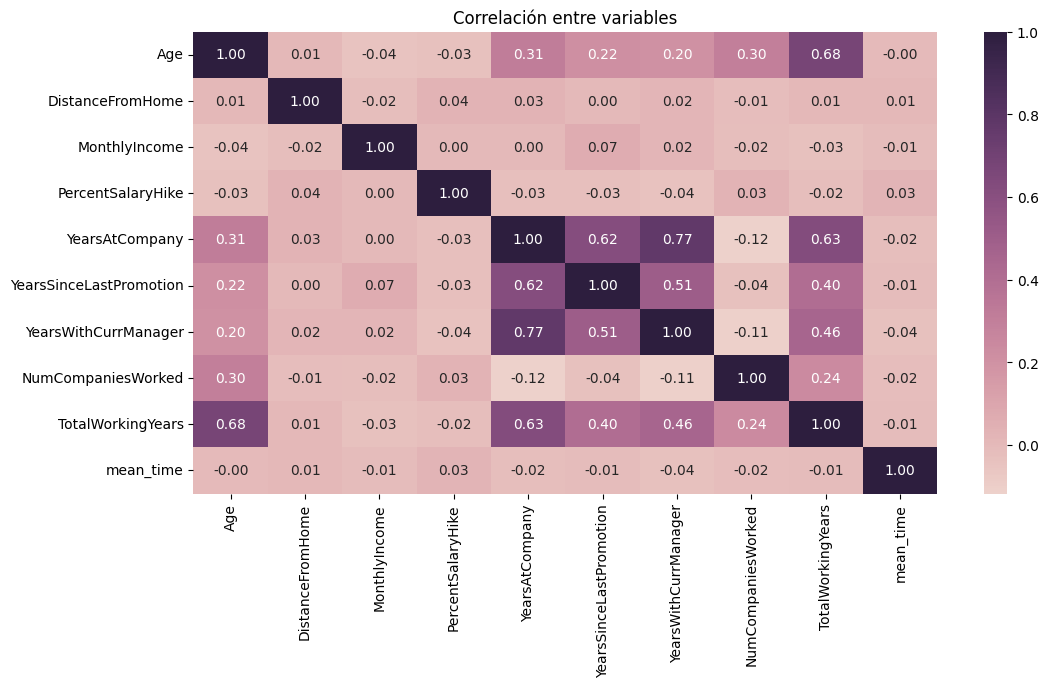

In [456]:
#Análisis de correlación con variables numericas
plt.figure(figsize = (12, 6))
sns.heatmap(X_corr.corr(), annot = True, cmap = sns.cubehelix_palette(as_cmap=True), fmt = ".2f")
plt.title("Correlación entre variables")

**Análisis**

Se puede observar que las variables:
* Age
* YearsAtCompany
* YearsSinceLastPromotion
* YearsWithCurrManager
* TotalWorkingYears

Presentan una correlación positiva entre ellas, lo cual puede deberse a su naturaleza, ya que a mayor edad, mayor cantidad de años trabajando, lo que permite una mayor cantidad de años trabajando en la misma empresa y que haya sido promovido por su experiencia, además de haber estado una mayor cantidad de años trabajando bajo el mismo jefe.



BASE DE DATOS CON VARIABLES TRANSFORMADAS


In [457]:
#Unimos las bases de datos con las variables resultantes 
X_final=pd.concat([X_int, X_float, X_object_t], axis=1)
X_final.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked,TotalWorkingYears,mean_time,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,PerformanceRating_3,PerformanceRating_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,Education_1,Education_2,Education_3,Education_4,Education_5,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,EnvironmentSatisfaction_1.0,EnvironmentSatisfaction_2.0,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_1.0,JobSatisfaction_2.0,JobSatisfaction_3.0,JobSatisfaction_4.0,WorkLifeBalance_1.0,WorkLifeBalance_2.0,WorkLifeBalance_3.0,WorkLifeBalance_4.0
0,51.0,6.0,131160.0,11.0,1.0,0.0,0.0,1.0,1.0,6.8702,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,31.0,10.0,41890.0,23.0,5.0,1.0,4.0,0.0,6.0,7.3160,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,32.0,17.0,193280.0,15.0,5.0,0.0,3.0,1.0,5.0,6.8161,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,38.0,2.0,83210.0,11.0,8.0,7.0,5.0,3.0,13.0,6.7892,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
4,32.0,10.0,23420.0,12.0,6.0,0.0,4.0,4.0,9.0,7.8776,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


##CORRELACIÓN DE VARIABLES DUMMIES

In [458]:
#Análisis de correlación con variables dummys
plt.figure(figsize = (100, 100))
sns.heatmap(X_object_t.corr(), annot = True, cmap = sns.cubehelix_palette(as_cmap=True), fmt = ".2f")
plt.title("Correlación entre variables")

Text(0.5, 1.0, 'Correlación entre variables')

**Análisis**

A pesar de la gran cantidad de variables, solo se presenta una relación fuerte entre las variables del departamento de la empresa con las de ambito de formación, lo cual se puede relacionar facilmente, ya que si un trabajador estudia recursos humanos lo más natural es que trabaje en este departamento dentro de la empresa, al igual que estudiar Marketing con trabajar en el departamento de ventas

<h1>Al final quedamos con las variables <br>X_final <br>Y </h1>

##MODELOS

###Aplicacion de Regresión Logistica sin seleccion de variables

In [459]:

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=1)

#Imprimir Tamaño de dataset, corresponden al 80,20
print("Tamaño del conjunto de entrenamiento. X: ", X_train.shape," Y: ", y_train.shape)
print("Tamaño del conjunto de validación. X: ", X_test.shape," Y: ", y_test.shape )

#Nombre de caracteristicas númericas
numeric_columns=list(X_final.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([( "std_numericas",StandardScaler() , numeric_columns)], remainder='passthrough')

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
# X_train = X_train.reset_index()
# X_train.drop(['index'], axis=1, inplace=True)

Tamaño del conjunto de entrenamiento. X:  (3528, 75)  Y:  (3528, 1)
Tamaño del conjunto de validación. X:  (882, 75)  Y:  (882, 1)


In [460]:
# Modelo de regresión logística 1
log_model_1 = LogisticRegression(class_weight="balanced", random_state=1, max_iter=1000)
log_model_1.fit(X_train, y_train)
# Predicciones
y_pred = log_model_1.predict(X_test)

print("Score: ", log_model_1.score(X_test, y_test))
print("F1-score: ", f1_score(y_test, y_pred))

Score:  0.7369614512471655
F1-score:  0.5105485232067511


In [461]:
# Predicciones en entrenamiento
y_pred_train = log_model_1.predict(X_train)

print("Score: ", log_model_1.score(X_train, y_train))
print("F1-score: ", f1_score(y_train, y_pred_train))

Score:  0.753968253968254
F1-score:  0.4953488372093023


#### Cálculos de métricas con la matriz de confusión

In [462]:
print(y_pred_train.shape, y_train.shape, y_test.shape, y_pred.shape,)

(3528,) (3528, 1) (882, 1) (882,)


##### Matriz de confusión Y_TRAIN

Accuracy of the classifier is: 0.753968253968254


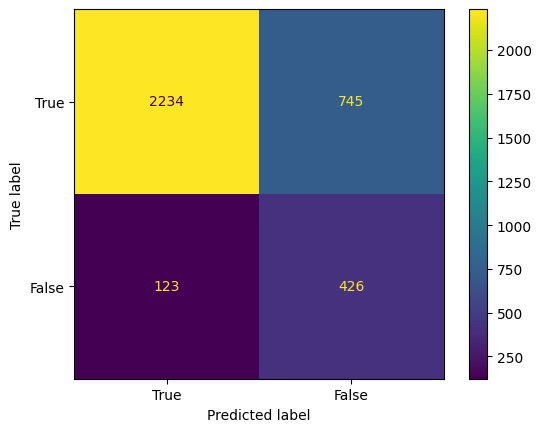

In [463]:
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_train, y_pred_train)}")

# Matriz de confusion
cm_train= confusion_matrix(y_train, y_pred_train)
# Visualización de la matriz de confusion
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [True, False])
cm_train_display.plot()
plt.show()

In [464]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm_train.ravel()

# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precicion: {precision}')
print(f'Recuperacion: {recall}')
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {especificidad}')

Precicion: 0.3637916310845431
Recuperacion: 0.7759562841530054
F1-score: 0.4953488372093023
Especificidad: 0.7499160792212152


Según las métricas de desempeño obtenidas, se puede decir que: 

* El valor de precisión de 0.36 indica que el modelo ha identificado correctamente el 36% de los empleados que finalmente abandonaron la empresa. En otras palabras, de todas las predicciones positivas realizadas por el modelo, solo el 36% eran verdaderos positivos, lo que indica que hay una gran cantidad de falsos positivos.

* El valor de sensibilidad o recuperación de 0.77 indica que el modelo ha identificado correctamente el 77% de los empleados que realmente abandonaron la empresa. En otras palabras, de todas las muestras que eran positivas, el modelo identificó correctamente el 77%, mientras que el 23% se clasificaron incorrectamente como negativas.

* La puntuación F1 de 0.49 combina la precisión y la sensibilidad en una única métrica, lo que indica que el modelo tiene un desempeño moderado en la identificación de los empleados que abandonan la empresa.

* El valor de especificidad de 0.749 indica que el modelo ha identificado correctamente el 75% de los empleados que finalmente permanecieron en la empresa. En otras palabras, de todas las muestras que eran negativas, el modelo identificó correctamente el 75%, mientras que el 25% se clasificaron incorrectamente como positivas.

En general, estos resultados sugieren que el modelo no tiene un desempeño óptimo en la identificación de los empleados que abandonan la empresa. El bajo valor de precisión sugiere que el modelo puede estar identificando muchos empleados como propensos a abandonar la empresa, cuando en realidad no lo harán. El valor moderado de la puntuación F1 indica que el modelo tiene un desempeño intermedio en la identificación de empleados que abandonan la empresa.

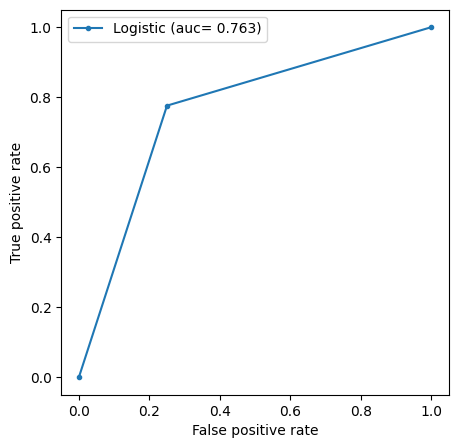

In [465]:
from sklearn.metrics import roc_curve, auc
FP_r, TP_r, threshold=roc_curve(y_train, y_pred_train)
auc=auc(FP_r, TP_r)
plt.figure(figsize=(5,5))
plt.plot(FP_r, TP_r,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()


Analisis

Se puede observar que el modelo con todas las variables, aplicando la regresión logistica, nos muestra una alto AUC de 0.763, lo que indica que el modelo es bueno prediciendo la variable objetivo Y_TRAIN

##### Matriz de confusión Y_TEST

Accuracy of the classifier is: 0.7369614512471655


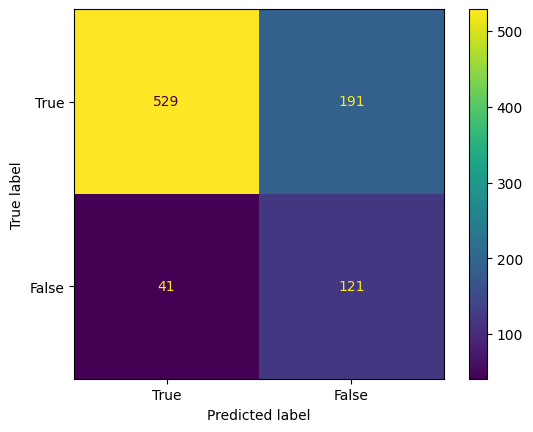

In [466]:
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

# Matriz de confusion
cm_test= confusion_matrix(y_test, y_pred)
# Visualización de la matriz de confusion
cm_test_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [True, False])
cm_test_display.plot()
plt.show()

In [467]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm_test.ravel()

# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precicion: {precision}')
print(f'Recuperacion: {recall}')
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {especificidad}')

Precicion: 0.38782051282051283
Recuperacion: 0.7469135802469136
F1-score: 0.5105485232067511
Especificidad: 0.7347222222222223


Según las métricas de desempeño obtenidas, se puede decir que: 

* El valor de precisión de 0.38 indica que el modelo ha identificado correctamente el 38% de los empleados que finalmente abandonaron la empresa. En otras palabras, de todas las predicciones positivas realizadas por el modelo, solo el 38% eran verdaderos positivos, lo que indica que hay una gran cantidad de falsos positivos.

* El valor de sensibilidad o recuperación de 0.74 indica que el modelo ha identificado correctamente el 74% de los empleados que realmente abandonaron la empresa. En otras palabras, de todas las muestras que eran positivas, el modelo identificó correctamente el 74%, mientras que el 23% se clasificaron incorrectamente como negativas.

* La puntuación F1 de 0.51 combina la precisión y la sensibilidad en una única métrica, lo que indica que el modelo tiene un desempeño moderado en la identificación de los empleados que abandonan la empresa.

* El valor de especificidad de 0.73 indica que el modelo ha identificado correctamente el 73% de los empleados que finalmente permanecieron en la empresa. En otras palabras, de todas las muestras que eran negativas, el modelo identificó correctamente el 73%, mientras que el 27% se clasificaron incorrectamente como positivas.

De las métricas de desempeño se puede decir que los valores de precisión y recuperación indican que el modelo tiene una tendencia a clasificar erróneamente muchos casos como positivos, lo que puede ser perjudicial para la toma de decisiones en la empresa. El F1-score indica que el modelo tiene un rendimiento moderado para identificar los empleados que abandonan la empresa. En cuanto a la especificidad, el modelo tiene una capacidad moderada para detectar los casos negativos.

En conclusión, aunque el modelo puede detectar una gran cantidad de casos positivos, también clasifica erróneamente muchos casos como positivos, lo que puede ser problemático para la toma de decisiones. Se podría considerar la optimización del modelo para mejorar su precisión y reducir la tasa de falsos positivos.



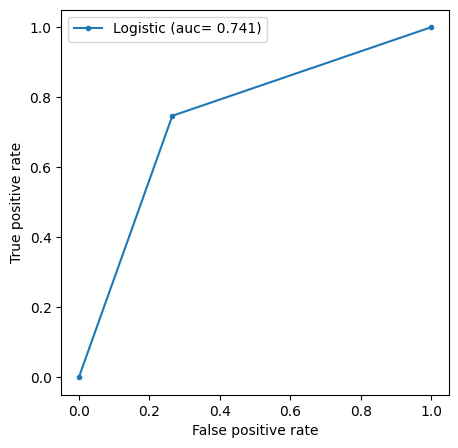

In [468]:
from sklearn.metrics import roc_curve, auc
FP_r, TP_r, threshold=roc_curve(y_test, y_pred)
auc=auc(FP_r, TP_r)
plt.figure(figsize=(5,5))
plt.plot(FP_r, TP_r,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()


Analisis

Se puede observar que el modelo con todas las variables, aplicando la regresión logistica, nos muestra una alto AUC de 0.741, lo que indica que el modelo es bueno prediciendo la variable objetivo Y_TEST

###Aplicacion de Regresión Logistica con seleccion de variables

In [469]:
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=1)

#Imprimir Tamaño de dataset, corresponden al 80,20
print("Tamaño del conjunto de entrenamiento. X: ", X_train.shape," Y: ", y_train.shape)
print("Tamaño del conjunto de validación. X: ", X_test.shape," Y: ", y_test.shape )

#Nombre de caracteristicas númericas
numeric_columns=list(X_final.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([( "std_numericas",StandardScaler() , numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento. X:  (3528, 75)  Y:  (3528, 1)
Tamaño del conjunto de validación. X:  (882, 75)  Y:  (882, 1)


####Selección de variables por método Lasso

#####Lasso con alpha 0.01 y 13 variables

In [470]:
#Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=0.01), max_features=15)
sel_.fit(X_train_std, y_train)

#Imprimir coeficientes del estimador
print(sel_.estimator_.coef_)

#Obtener variables seleccionadas
X_new = sel_.get_support()

#Filtrar X_train y Y_train para eliminar variables con coeficiente 0
#Son  X_train y Y_train o X_new_train, X_new_test los que se sacan
X_new_train = X_train_std[:,X_new]
X_new_test = X_test_std[:,X_new]

[-0.0261954  -0.         -0.00058736  0.         -0.          0.00985759
 -0.03067513  0.01788754 -0.02706161  0.0613969  -0.          0.02750756
 -0.          0.         -0.         -0.          0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.          0.         -0.         -0.          0.
  0.          0.         -0.         -0.         -0.          0.0817191
  0.         -0.          0.         -0.         -0.          0.
  0.          0.         -0.          0.         -0.          0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.          0.
 -0.         -0.         -0.          0.05259276 -0.         -0.
 -0.          0.00172062 -0.          0.         -0.03826867  0.
  0.         -0.00409612  0.        ]


In [471]:
print(X_new_train.shape)

(3528, 13)


In [472]:
print(X_new_test.shape)

(882, 13)


Basados en el método Lasso con alpha 0.01 y 13 variables, se selecciona trece variables.

In [473]:
# Modelo de regresión logística 1
log_model_1 = LogisticRegression(class_weight="balanced", random_state=1, max_iter=1000)
log_model_1.fit(X_new_train, y_train)
# Predicciones
y_pred = log_model_1.predict(X_new_test)

print("Score: ", log_model_1.score(X_new_test, y_test))
print("F1-score: ", f1_score(y_test, y_pred))

Score:  0.7301587301587301
F1-score:  0.5122950819672131


Las metricas de desempeño Score y F1-score muestran que el modelo tiene un desempeño moderado.

El puntaje de 0.73 de la métrica score indica que el modelo tiene una precisión moderada para predecir la probabilidad de que un empleado abandone la empresa. Es decir, el modelo es capaz de clasificar correctamente a un 73% de los empleados como abandonados o no abandonados. Sin embargo, esto no proporciona información sobre qué tan bien está funcionando el modelo en términos de su capacidad para identificar a los empleados que abandonarán la empresa en el futuro.

Por otro lado, el valor de F1-score de 0.51 indica que el modelo tiene un desempeño moderado en la precisión y la recuperación. Esto significa que el modelo puede identificar correctamente alrededor del 51% de los empleados que abandonarán la empresa y al mismo tiempo minimizar la cantidad de falsos positivos (empleados que no abandonarán la empresa pero que el modelo los predice como abandonados).

In [474]:
# Predicciones en entrenamiento
y_pred_train = log_model_1.predict(X_new_train)

print("Score: ", log_model_1.score(X_new_train, y_train))
print("F1-score: ", f1_score(y_train, y_pred_train))

Score:  0.7264739229024944
F1-score:  0.45938375350140054


Accuracy of the classifier is: 0.7264739229024944


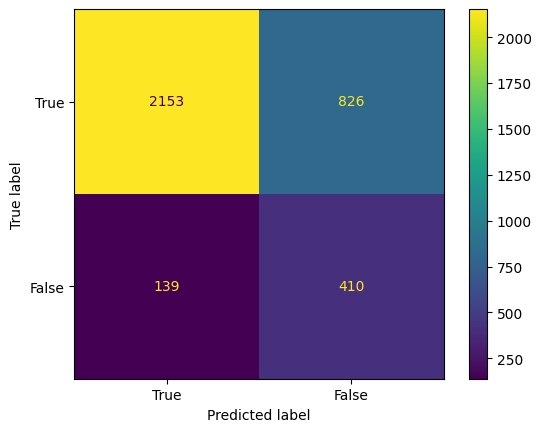

In [475]:
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_train, y_pred_train)}")

# Matriz de confusion
cm_train= confusion_matrix(y_train, y_pred_train)
# Visualización de la matriz de confusion
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [True, False])
cm_train_display.plot()
plt.show()

In [476]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm_train.ravel()

# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precicion: {precision}')
print(f'Recuperacion: {recall}')
print("F1-score: ", f1_score(y_train, y_pred_train))
print(f'Especificidad: {especificidad}')

Precicion: 0.33171521035598706
Recuperacion: 0.7468123861566485
F1-score:  0.45938375350140054
Especificidad: 0.7227257468949312


Según las métricas de desempeño obtenidas, se puede decir que:

El valor de precisión de 0.33 indica que el modelo ha identificado correctamente el 33% de los empleados que finalmente abandonaron la empresa. En otras palabras, de todas las predicciones positivas realizadas por el modelo, solo el 33% eran verdaderos positivos, lo que indica que hay una gran cantidad de falsos positivos.

El valor de sensibilidad o recuperación de 0.746 indica que el modelo ha identificado correctamente el 75% de los empleados que realmente abandonaron la empresa. En otras palabras, de todas las muestras que eran positivas, el modelo identificó correctamente el 75%, mientras que el 25% se clasificaron incorrectamente como negativas.

La puntuación F1 de 0.459 combina la precisión y la sensibilidad en una única métrica, lo que indica que el modelo tiene un desempeño moderado en la identificación de los empleados que abandonan la empresa.

El valor de especificidad de 0.72 indica que el modelo ha identificado correctamente el 72% de los empleados que finalmente permanecieron en la empresa. En otras palabras, de todas las muestras que eran negativas, el modelo identificó correctamente el 72%, mientras que el 28% se clasificaron incorrectamente como positivas.

En general, estos resultados sugieren que el modelo no tiene un desempeño óptimo en la identificación de los empleados que abandonan la empresa. El bajo valor de precisión sugiere que el modelo puede estar identificando muchos empleados como propensos a abandonar la empresa, cuando en realidad no lo harán. El valor moderado de la puntuación F1 indica que el modelo tiene un desempeño intermedio en la identificación de empleados que abandonan la empresa.

In [477]:
f1_score(y_test, y_pred)

0.5122950819672131

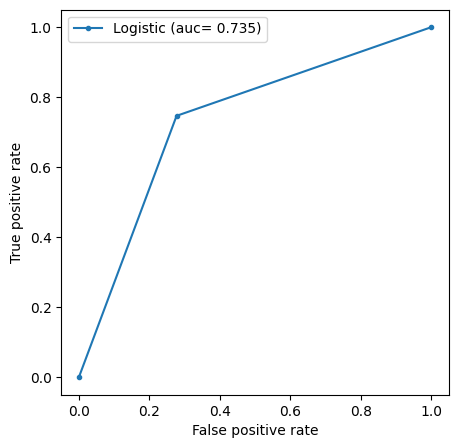

In [478]:
from sklearn.metrics import roc_curve, auc
FP_r, TP_r, threshold=roc_curve(y_train, y_pred_train)
auc=auc(FP_r, TP_r)
plt.figure(figsize=(5,5))
plt.plot(FP_r, TP_r,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

Analisis

Se puede observar que el modelo con todas las variables, aplicando la regresión logistica, nos muestra una alto AUC de 0.735, lo que indica que el modelo es bueno prediciendo la variable objetivo Y_TRAIN

Accuracy of the classifier is: 0.7301587301587301


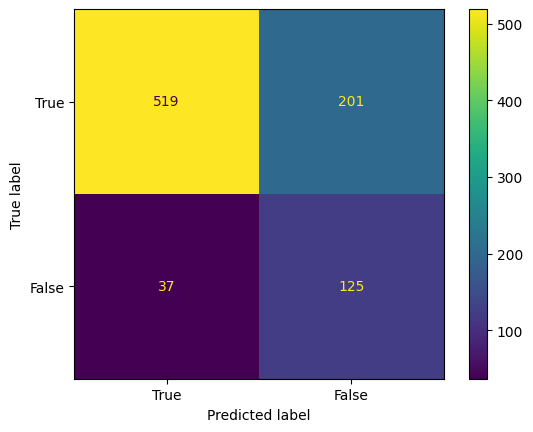

In [479]:
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

# Matriz de confusion
cm_test= confusion_matrix(y_test, y_pred)
# Visualización de la matriz de confusion
cm_test_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [True, False])
cm_test_display.plot()
plt.show()

In [480]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm_test.ravel()

# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precicion: {precision}')
print(f'Recuperacion: {recall}')
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {especificidad}')

Precicion: 0.3834355828220859
Recuperacion: 0.7716049382716049
F1-score: 0.5122950819672131
Especificidad: 0.7208333333333333


Según las métricas de desempeño obtenidas, se puede decir que:

El valor de precisión de 0.38 indica que el modelo ha identificado correctamente el 38% de los empleados que finalmente abandonaron la empresa. En otras palabras, de todas las predicciones positivas realizadas por el modelo, solo el 38% eran verdaderos positivos, lo que indica que hay una gran cantidad de falsos positivos.

El valor de sensibilidad o recuperación de 0.77 indica que el modelo ha identificado correctamente el 77% de los empleados que realmente abandonaron la empresa. En otras palabras, de todas las muestras que eran positivas, el modelo identificó correctamente el 77%, mientras que el 23% se clasificaron incorrectamente como negativas.

La puntuación F1 de 0.51 combina la precisión y la sensibilidad en una única métrica, lo que indica que el modelo tiene un desempeño moderado en la identificación de los empleados que abandonan la empresa.

El valor de especificidad de 0.72 indica que el modelo ha identificado correctamente el 73% de los empleados que finalmente permanecieron en la empresa. En otras palabras, de todas las muestras que eran negativas, el modelo identificó correctamente el 72%, mientras que el 28% se clasificaron incorrectamente como positivas.

En general, estos resultados sugieren que el modelo no tiene un desempeño óptimo en la identificación de los empleados que abandonan la empresa. El bajo valor de precisión sugiere que el modelo puede estar identificando muchos empleados como propensos a abandonar la empresa, cuando en realidad no lo harán. El valor moderado de la puntuación F1 indica que el modelo tiene un desempeño intermedio en la identificación de empleados que abandonan la empresa.

Ahora, en comparación con el modelo 1, se puede observar que ambos modelos tienen un rendimiento similar, con una tendencia a clasificar erróneamente muchos casos como positivos, lo que puede ser perjudicial para la toma de decisiones. Sin embargo, el modelo de la segunda métrica tiene una mejor recuperación, lo que significa que es capaz de detectar más instancias positivas. Esto puede ser beneficioso para la empresa si la prioridad es identificar a todos los empleados que abandonan la empresa. En cualquier caso, se podría considerar la optimización del modelo para mejorar su precisión y reducir la tasa de falsos positivos.

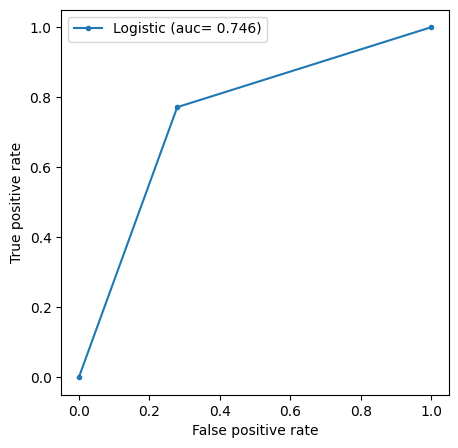

In [481]:
from sklearn.metrics import roc_curve, auc
FP_r, TP_r, threshold=roc_curve(y_test, y_pred)
auc=auc(FP_r, TP_r)
plt.figure(figsize=(5,5))
plt.plot(FP_r, TP_r,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()


#####Lasso con alpha de 0.05 y 3 variables

In [482]:
#Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=0.05), max_features=10)
sel_.fit(X_train_std, y_train)

#Imprimir coeficientes del estimador
print(sel_.estimator_.coef_)

#Obtener variables seleccionadas
X_new = sel_.get_support()

#Filtrar X_train y Y_train para eliminar variables con coeficiente 0
#Son  X_train y Y_train o X_new_train, X_new_test los que se sacan
X_new_train = X_train_std[:,X_new]
X_new_test = X_test_std[:,X_new]

[-0.         -0.         -0.          0.         -0.         -0.
 -0.00311893  0.         -0.01308231  0.02057526 -0.          0.
 -0.          0.          0.         -0.          0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.          0.         -0.         -0.          0.
  0.          0.         -0.         -0.         -0.          0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.         -0.          0.         -0.          0.
 -0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.          0.
  0.         -0.          0.        ]


In [483]:
print(X_new_train.shape)

(3528, 3)


In [484]:
print(X_new_test.shape)

(882, 3)


Basados en el método Lasso con alpha 0.05 y 10 variables, se selecciona tres variables.

In [485]:
# Modelo de regresión logística 1
log_model_1 = LogisticRegression(class_weight="balanced", random_state=1, max_iter=1000)
log_model_1.fit(X_new_train, y_train)
# Predicciones
y_pred = log_model_1.predict(X_new_test)

print("Score: ", log_model_1.score(X_new_test, y_test))
print("F1-score: ", f1_score(y_test, y_pred))

Score:  0.6462585034013606
F1-score:  0.3976833976833977


Las metricas de desempeño Score y F1-score muestran que el modelo tiene un desempeño bajo.

El puntaje de 0.64 de la métrica score indica que el modelo tiene una precisión moderada para predecir la probabilidad de que un empleado abandone la empresa. Es decir, el modelo es capaz de clasificar correctamente a un 64% de los empleados como abandonados o no abandonados. Sin embargo, esto no proporciona información sobre qué tan bien está funcionando el modelo en términos de su capacidad para identificar a los empleados que abandonarán la empresa en el futuro.

Por otro lado, el valor de F1-score de 0.397 es notablemente más baja que las dos métricas anteriores. Esto sugiere que el modelo que generó estas métricas no tiene un rendimiento tan bueno como los modelos previos en términos de equilibrio entre la precisión y la recuperación.

Es posible que el modelo tenga una alta precisión pero una baja recuperación, lo que significa que puede identificar correctamente una gran proporción de casos positivos, pero que también puede estar perdiendo muchos casos positivos. Esta baja recuperación puede ser problemática si se trata de identificar empleados que abandonan la empresa, ya que se podrían estar perdiendo señales importantes para tomar decisiones efectivas.

In [486]:
# Predicciones en entrenamiento
y_pred_train = log_model_1.predict(X_new_train)

print("Score: ", log_model_1.score(X_new_train, y_train))
print("F1-score: ", f1_score(y_train, y_pred_train))

Score:  0.6567460317460317
F1-score:  0.3748064016520392


Accuracy of the classifier is: 0.6567460317460317


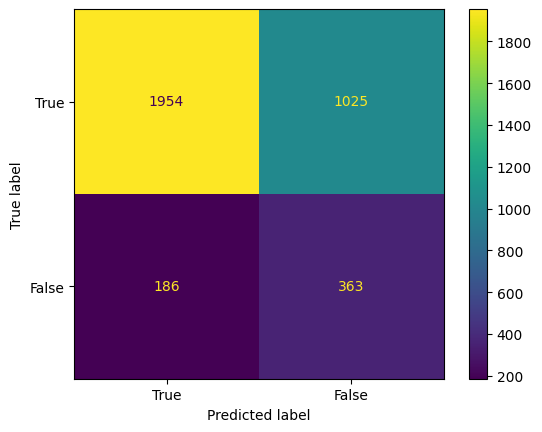

In [487]:
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_train, y_pred_train)}")

# Matriz de confusion
cm_train= confusion_matrix(y_train, y_pred_train)
# Visualización de la matriz de confusion
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [True, False])
cm_train_display.plot()
plt.show()

In [488]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm_train.ravel()

# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precicion: {precision}')
print(f'Recuperacion: {recall}')
print("F1-score: ", f1_score(y_train, y_pred_train))
print(f'Especificidad: {especificidad}')

Precicion: 0.2615273775216138
Recuperacion: 0.6612021857923497
F1-score:  0.3748064016520392
Especificidad: 0.6559248069822088


En el contexto de un problema de abandono de empleados de una empresa, estos son los siguientes posibles significados de las métricas obtenidas a partir de la matriz de confusión que proporcionaste:

Precisión: El valor de precisión de 0.26 indica que el modelo ha identificado correctamente el 26% de los empleados que finalmente abandonaron la empresa. En otras palabras, de todas las predicciones positivas realizadas por el modelo, solo el 26% eran verdaderos positivos, lo que indica que hay una gran cantidad de falsos positivos.

Sensibilidad: El valor de sensibilidad de 0.66 indica que el modelo ha identificado correctamente el 66% de los empleados que realmente abandonaron la empresa. En otras palabras, de todas las muestras que eran positivas, el modelo identificó correctamente el 66%, mientras que el 34% se clasificaron incorrectamente como negativas.

Puntuación F1: La puntuación F1 de 0.37 combina la precisión y la sensibilidad en una única métrica, lo que indica que el modelo tiene un desempeño moderado en la identificación de los empleados que abandonan la empresa.

Especificidad: El valor de especificidad de 0.65 indica que el modelo ha identificado correctamente el 65% de los empleados que finalmente permanecieron en la empresa. En otras palabras, de todas las muestras que eran negativas, el modelo identificó correctamente el 65%, mientras que el 35% se clasificaron incorrectamente como positivas.

En general, estos resultados sugieren que el modelo no tiene un desempeño óptimo en la identificación de los empleados que abandonan la empresa. El bajo valor de precisión sugiere que el modelo puede estar identificando muchos empleados como propensos a abandonar la empresa, cuando en realidad no lo harán. El valor moderado de la puntuación F1 indica que el modelo tiene un desempeño intermedio en la identificación de empleados que abandonan la empresa.

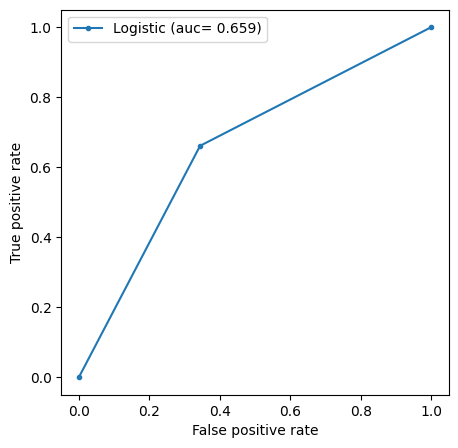

In [489]:
from sklearn.metrics import roc_curve, auc
FP_r, TP_r, threshold=roc_curve(y_train, y_pred_train)
auc=auc(FP_r, TP_r)
plt.figure(figsize=(5,5))
plt.plot(FP_r, TP_r,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

Analisis

Se puede observar que el modelo con todas las variables, aplicando la regresión logistica, nos muestra una alto AUC de 0.659, lo que indica que el modelo es bueno prediciendo la variable objetivo Y_TRAIN.

Ahora, comparandolo con los demás modelos, los anteriores modelos son mejores que este, ya que sus AUC son mucho mejor, los cuales están más cerca a 1.

Accuracy of the classifier is: 0.6462585034013606


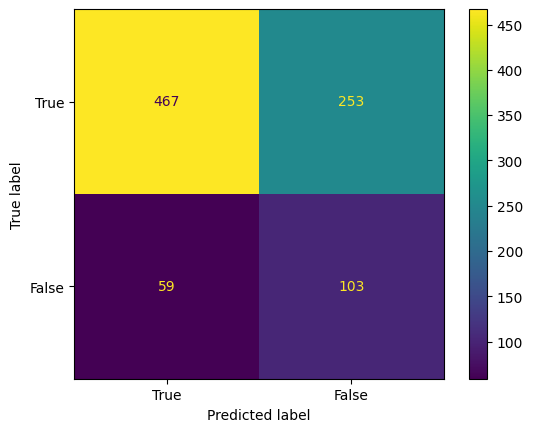

In [490]:
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

# Matriz de confusion
cm_test= confusion_matrix(y_test, y_pred)
# Visualización de la matriz de confusion
cm_test_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [True, False])
cm_test_display.plot()
plt.show()

In [491]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm_test.ravel()

# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precicion: {precision}')
print(f'Recuperacion: {recall}')
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {especificidad}')

Precicion: 0.2893258426966292
Recuperacion: 0.6358024691358025
F1-score: 0.3976833976833977
Especificidad: 0.6486111111111111


Según las métricas de desempeño obtenidas, se puede decir que:

El valor de precisión de 0.28 indica que el modelo ha identificado correctamente el 28% de los empleados que finalmente abandonaron la empresa. En otras palabras, de todas las predicciones positivas realizadas por el modelo, solo el 28% eran verdaderos positivos, lo que indica que hay una gran cantidad de falsos positivos.

El valor de sensibilidad o recuperación de 0.63 indica que el modelo ha identificado correctamente el 63% de los empleados que realmente abandonaron la empresa. En otras palabras, de todas las muestras que eran positivas, el modelo identificó correctamente el 63%, mientras que el 37% se clasificaron incorrectamente como negativas.

La puntuación F1 de 0.39 combina la precisión y la sensibilidad en una única métrica, lo que indica que el modelo tiene un desempeño moderado en la identificación de los empleados que abandonan la empresa.

El valor de especificidad de 0.64 indica que el modelo ha identificado correctamente el 64% de los empleados que finalmente permanecieron en la empresa. En otras palabras, de todas las muestras que eran negativas, el modelo identificó correctamente el 64%, mientras que el 28% se clasificaron incorrectamente como positivas.

En general, estos resultados sugieren que el modelo no tiene un desempeño óptimo en la identificación de los empleados que abandonan la empresa. El bajo valor de precisión sugiere que el modelo puede estar identificando muchos empleados como propensos a abandonar la empresa, cuando en realidad no lo harán. El valor moderado de la puntuación F1 indica que el modelo tiene un desempeño intermedio en la identificación de empleados que abandonan la empresa.

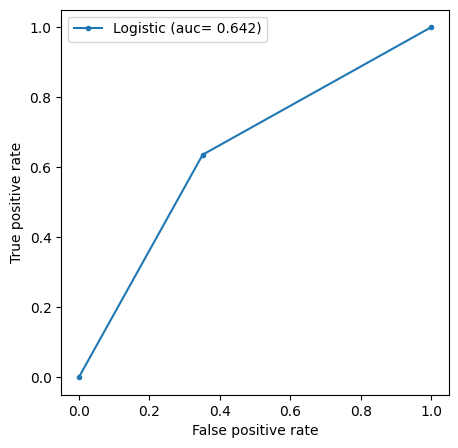

In [492]:
from sklearn.metrics import roc_curve, auc
FP_r, TP_r, threshold=roc_curve(y_test, y_pred)
auc=auc(FP_r, TP_r)
plt.figure(figsize=(5,5))
plt.plot(FP_r, TP_r,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()


A pesar de que este tiene un AUC mayor a 0.5, este sigue teniendo una métrica de desempeño inferior a los anteriores, convirtiendolo en la área bajo la curva con el valor más bajo. En otras palabras, este modelo cuenta con la capacidad de distinguir entre clases positivas y negativas más baja.

####Selección de variables basado en la prueba F de ANOVA

In [493]:
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=1)

#Imprimir Tamaño de dataset, corresponden al 80,20
print("Tamaño del conjunto de entrenamiento. X: ", X_train.shape," Y: ", y_train.shape)
print("Tamaño del conjunto de validación. X: ", X_test.shape," Y: ", y_test.shape )

#Nombre de caracteristicas númericas
numeric_columns=list(X_final.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([( "std_numericas",StandardScaler() , numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento. X:  (3528, 75)  Y:  (3528, 1)
Tamaño del conjunto de validación. X:  (882, 75)  Y:  (882, 1)


In [494]:
from sklearn.feature_selection import f_classif, SelectKBest

# Realizar prueba F de ANOVA para cada variable
fvalue_selector = SelectKBest(f_classif, k=5)
X_train_selected = fvalue_selector.fit_transform(X_train_std, y_train)

# Obtener índices de las variables seleccionadas
selected_indices = fvalue_selector.get_support(indices=True)

# Obtener nombres de las variables seleccionadas
selected_features = X_train.columns[selected_indices].tolist()

# Aplicar selección de variables al conjunto de prueba
X_test_selected = X_test.iloc[:, selected_indices]

Se hizo uso de la selcción de variables basado en la prueba F de ANOVA, en la cual se escogió las 5 caraxterísticas con los valores F más alto.

In [495]:
X_test_selected

,Age,YearsWithCurrManager,TotalWorkingYears,mean_time,MaritalStatus_Single
2016,48.0,1.0,27.0,5.8251,1
4118,21.0,2.0,2.0,7.7652,1
219,50.0,7.0,32.0,6.6528,0
4402,37.0,0.0,17.0,6.7975,0
787,40.0,2.0,8.0,6.2784,0
...,...,...,...,...,...
718,56.0,9.0,33.0,9.8120,0
332,33.0,7.0,14.0,6.7610,0
3398,41.0,11.0,21.0,7.6751,0
4032,27.0,7.0,9.0,7.1906,1


In [496]:
lr = LogisticRegression(random_state=0)

# Entrenar modelo con datos de entrenamiento seleccionados
lr.fit(X_train_selected, y_train)

# Hacer predicciones sobre datos de prueba seleccionados
y_pred = lr.predict(X_test_selected)

In [497]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Calcular métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir resultados
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc_auc)

Accuracy:  0.8163265306122449
Precision:  0.0
Recall:  0.0
F1 Score:  0.0
ROC AUC Score:  0.5


Estos resultados muestran que el modelo tiene una exactitud (Accuracy) del 81.63%, lo que significa que el modelo clasifica correctamente el 81.63% de los casos. Sin embargo, la precisión (Precision), que mide la proporción de resultados positivos que fueron identificados correctamente, es de 0.0. Esto sugiere que el modelo no es efectivo para identificar casos positivos correctamente. El recall (Recall), que mide la proporción de casos positivos que fueron identificados correctamente, también es de 0.0. Esto indica que el modelo no es efectivo para detectar casos positivos. El F1 Score es la media armónica de la precisión y el recall, y también es de 0.0 en este caso. El ROC AUC Score mide la capacidad del modelo para distinguir entre las clases positivas y negativas y su valor de 0.5 sugiere que el modelo no tiene capacidad para distinguir entre las dos clases. En resumen, estos resultados indican que el modelo no es efectivo para clasificar los casos correctamente y que necesita mejoras significativas en su desempeño.

Asimismo, lo anterior puede ser explicado porque hay que tener en cuenta que la selección de variables basada en la prueba F de ANOVA puede no ser la mejor opción en todos los casos, ya que esta técnica asume que las variables son independientes y tienen una distribución normal. Además, puede ser útil combinar la selección de variables con otras técnicas, como la validación cruzada, para obtener un modelo más robusto.

##CONCLUSIÓN ENTREGA 1

Como conclusión general, se puede evidenciar que el modelo que mejor f1-score presenta, es la de la regresión logistica sin la selección de variables, ya que al momento de aplicar el método lasso con un alpha de 0.01 y 13 variables, dicha métrica disminuía considerablemente al igual que cuando se aplica el mismo método pero con un alpha de 0.05 y 3 variables, el cual daba una métrica de desempeño más inferior a las anteriores. Por ultimo, se probó una prueba f de ANOVA, la cual arrojó resultados muy malos para este conunto de datos, donde el f1-score daba un valor de cero y el AUC un valor de  0.5 lo cual indica que el modelo no es mejor que un clasificador aleatorio.

#Entrega 2

##Librerias

In [547]:
#Librerias
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier


## Decision Tree Classifier

In [499]:
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=1)

#Imprimir Tamaño de dataset, corresponden al 80,20
print("Tamaño del conjunto de entrenamiento. X: ", X_train.shape," Y: ", y_train.shape)
print("Tamaño del conjunto de validación. X: ", X_test.shape," Y: ", y_test.shape )

#Nombre de caracteristicas númericas
numeric_columns=list(X_final.select_dtypes('float64').columns)

#Estandarización de variables númericas
# pipeline=ColumnTransformer([( "std_numericas",StandardScaler() , numeric_columns)], remainder='passthrough')

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
# X_train = X_train.reset_index()
# X_train.drop(['index'], axis=1, inplace=True)

Tamaño del conjunto de entrenamiento. X:  (3528, 75)  Y:  (3528, 1)
Tamaño del conjunto de validación. X:  (882, 75)  Y:  (882, 1)


0 = "No"
1 = "Yes"

### Hiperparametros


In [500]:
# Definición de cuadricula de hiperparametros
parameters = {'max_depth': [3,5,7,8,9],
              'max_features': [0.3,0.4,0.5,0.6,0.7,0.8],
              'max_leaf_nodes': [9,10,11,12,13,14,15,16,17],
              'min_samples_leaf': [3,4,5,7,10,12],
              'criterion': ['gini', 'entropy'],
              'splitter': ['best']}

* max_depth = Maxima profundidad

* 'max_features': Maximo de caracteristicas a usar,

* 'max_leaf_nodes': Maximo de nodos,

* 'min_samples_leaf': minimo de muestras para los nodos hoja,

* 'criterion': Medir la cantidad de división.

* 'splitter': Estrategia para dividir cada nodo


In [501]:
ranfor = tree.DecisionTreeClassifier(random_state=1)

#### Búsqueda en cuadrícula

In [503]:

grid_search = GridSearchCV(ranfor, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 0.8, 'max_leaf_nodes': 17, 'min_samples_leaf': 4, 'splitter': 'best'}
Best Score:  0.8642287987463082


#### Búsqueda aleatoria

In [504]:
rand_s = RandomizedSearchCV(estimator=ranfor, param_distributions=parameters, n_iter=10, scoring='accuracy', cv=5, verbose=False)
rand_s.fit(X_train, y_train)

print('Best Params: ', rand_s.best_params_)
print('Best Score: ', rand_s.best_score_)

Best Params:  {'splitter': 'best', 'min_samples_leaf': 5, 'max_leaf_nodes': 15, 'max_features': 0.8, 'max_depth': 7, 'criterion': 'gini'}
Best Score:  0.861676410905511


### Modelo | Decision Tree

Se utilizan las metricas dadas por la busqueda en cuadrícula ya que tiene una mayor precisión.


In [505]:
# Entrenamiento del modelo
# ==============================================================================
clf = tree.DecisionTreeClassifier(
          criterion = 'gini', 
          max_depth = 7,
          max_features = 0.8,
          max_leaf_nodes = 17,
          min_samples_leaf = 4,
          splitter = 'best',
          random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=0.8, max_leaf_nodes=17,
                       min_samples_leaf=4, random_state=0)

In [506]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, clf.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test)))

Train - Accuracy : 0.8761337868480725
Train - classification report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2979
           1       0.65      0.45      0.53       549

    accuracy                           0.88      3528
   macro avg       0.78      0.70      0.73      3528
weighted avg       0.86      0.88      0.87      3528

Test - Accuracy : 0.8401360544217688
Test - classification report :               precision    recall  f1-score   support

           0       0.87      0.94      0.91       720
           1       0.60      0.38      0.46       162

    accuracy                           0.84       882
   macro avg       0.74      0.66      0.68       882
weighted avg       0.82      0.84      0.82       882



Profundidad del árbol: 6
Número de nodos terminales: 17


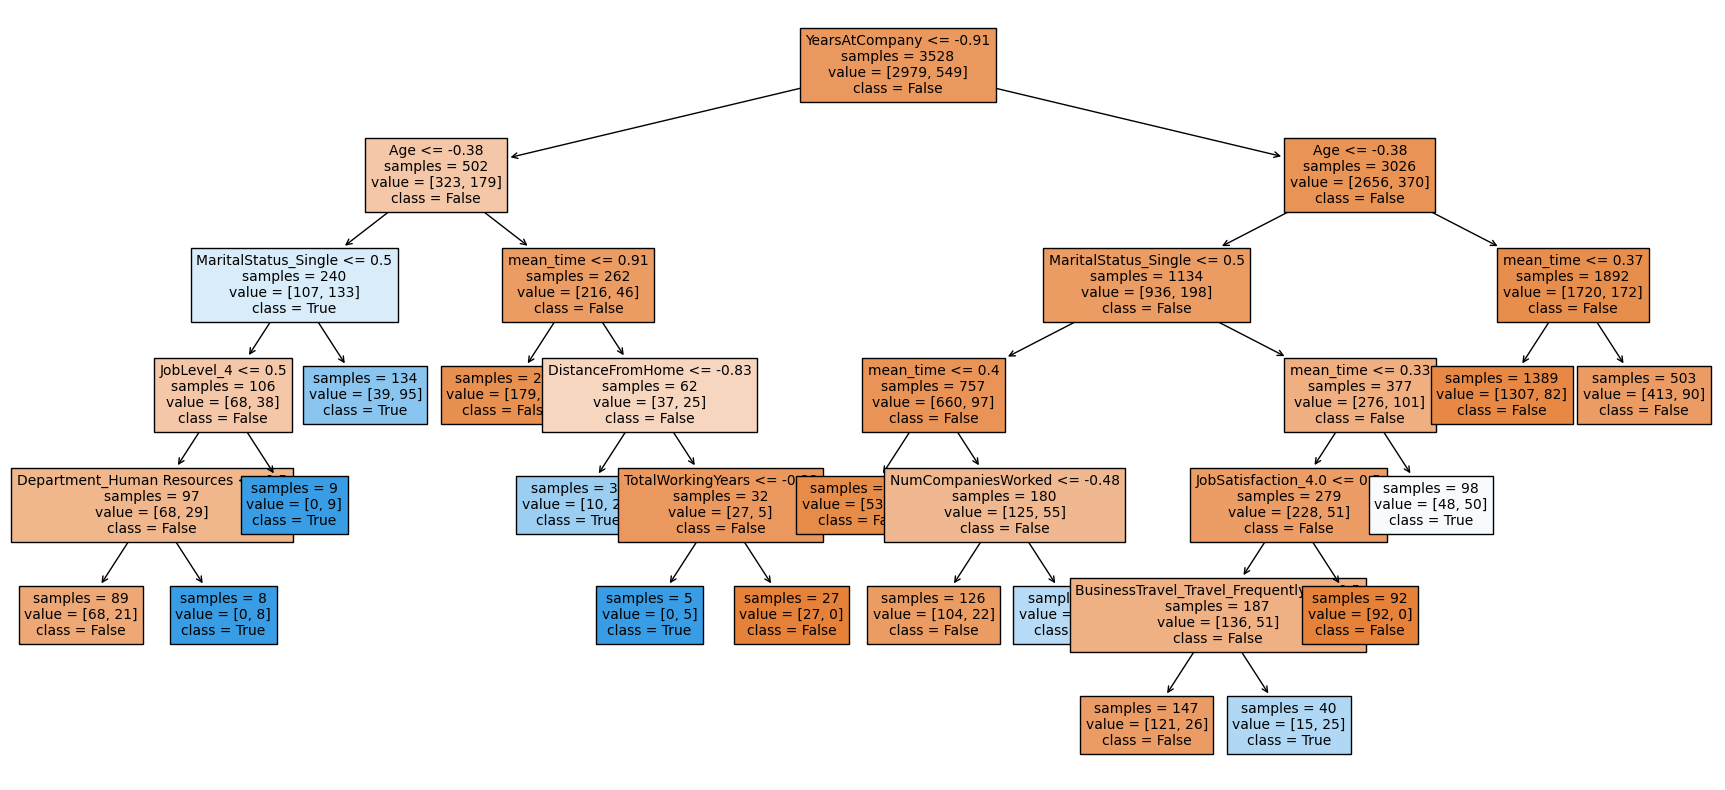

In [507]:
# Visualización del arbol
# ==============================================================================

fig, ax = plt.subplots(figsize=(22, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = X_final.columns,
            class_names   = ['False', 'True'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

Se puede concluir que la precisión del modelo es buena, pero al observar los nodos hojas se puede observar que hay variedad en la mayoria de la etiquetas, por lo que si se quiere tener una mayor clasificación hace falta extender el arbol.



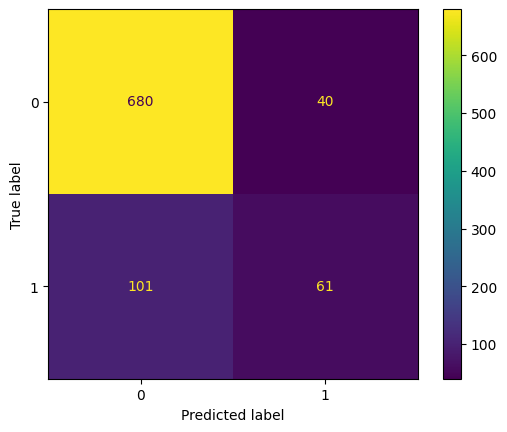

In [508]:
# Matriz de confusion
cm1= confusion_matrix(y_test, clf.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

Attrition: Indica si el empleado dejó la compañía o no. Los valores posibles son "Yes" y "No".

Recordando: 0 = No / 1 = Yes

Se puede observar en la matriz de confusión que el modelo tiende a fallar en falsos negativos y la precisión de los verdaderos negativos es baja.

Falso negativo: Esto se interpreta como que el empleado que sí va a abandonar la compañia y no la abandona.



In [509]:
columnas=pd.DataFrame(X_final.columns).rename(columns={0:'columnas'})
importancia=pd.DataFrame(clf.feature_importances_).rename(columns={0:'importancia'})
cf=pd.concat([columnas,importancia], axis=1).sort_values('importancia',ascending=False).head(7)

In [510]:
cf

,columnas,importancia
9,mean_time,0.209257
4,YearsAtCompany,0.200047
0,Age,0.193983
35,MaritalStatus_Single,0.103130
7,NumCompaniesWorked,0.060956
11,BusinessTravel_Travel_Frequently,0.053442
70,JobSatisfaction_4.0,0.038817


In [511]:

fig = px.bar(cf, x='columnas', y='importancia', color = 'columnas',  title ='<b>Importancia de los factores que analiza el modelo<b>')
fig.update_layout(
    xaxis_title = 'Importancia de los factores',
    yaxis_title = 'Factores',
    template = 'simple_white',
    title_x = 0.5,
    showlegend=False)

## Random Forest Classifier

### Hiperparametros

In [512]:
# Definición de cuadricula de hiperparametros
parameters = {'max_depth': [5,7,9],
              'max_features': [0.5,0.7,0.8],
              'min_samples_split': [7,10],
              'criterion': ['gini', 'entropy'],
              'n_estimators': [300,500,800]}

* 'max_depth': Máxima profundidad del árbol,

* 'max_features': Número de características a considerar para la división,

* 'min_samples_split': Número mínimo de muestras para dividir un nodo interno,

* 'criterion': Función para medir la calidad de la división,

* 'n_estimators': Número de árboles en el bosque

In [513]:
ranfor = RandomForestClassifier(random_state = 1)

#### Búsqueda en cuadrícula -- para este modelo consume demasiados recursos


In [ ]:
## Consume demasiados recursos, por lo que no es optimo para estos datasets

# grid_search = GridSearchCV(ranfor, parameters, cv=5, scoring='accuracy', n_jobs=-1)
# grid_result = grid_search.fit(X_train, y_train)

# print('Best Params: ', grid_result.best_params_)
# print('Best Score: ', grid_result.best_score_)

#### Búsqueda aleatoria

In [515]:
rand_s = RandomizedSearchCV(estimator=ranfor, param_distributions=parameters, n_iter=10, scoring='accuracy', cv=5, verbose=False)

rand_s.fit(X_train, y_train)

print('Best Params: ', rand_s.best_params_)
print('Best Score: ', rand_s.best_score_)

Best Params:  {'n_estimators': 800, 'min_samples_split': 10, 'max_features': 0.8, 'max_depth': 9, 'criterion': 'entropy'}
Best Score:  0.9316870592489904


### Modelo | Random Forest

In [527]:
# Entrenamiento del modelo
# ==============================================================================
random_forest = RandomForestClassifier(
            n_estimators = 800,
            criterion = 'entropy',
            max_depth = 9,
            min_samples_split = 10,
            max_features = 0.8,
            # oob_score = False,
            n_jobs = -1,
            # random_state = 1
            # max_leaf_nodes = 10,
         )
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=0.8,
                       min_samples_split=10, n_estimators=800, n_jobs=-1)

In [528]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, random_forest.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, random_forest.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, random_forest.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, random_forest.predict(X_test)))

Train - Accuracy : 0.9767573696145124
Train - classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2979
           1       1.00      0.85      0.92       549

    accuracy                           0.98      3528
   macro avg       0.99      0.93      0.95      3528
weighted avg       0.98      0.98      0.98      3528

Test - Accuracy : 0.9308390022675737
Test - classification report :               precision    recall  f1-score   support

           0       0.92      1.00      0.96       720
           1       0.99      0.63      0.77       162

    accuracy                           0.93       882
   macro avg       0.96      0.81      0.86       882
weighted avg       0.94      0.93      0.92       882



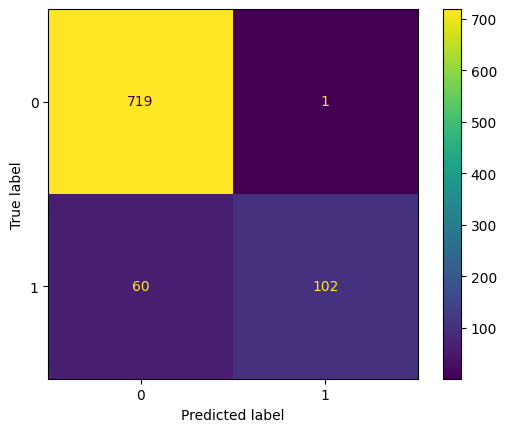

In [531]:
# Matriz de confusion
cm1= confusion_matrix(y_test, random_forest.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

Se puede ver que el modelo de Random Forest ha mejorado la precisión, reduciendo a 1 el error Falso positivo, el cual significa que el empleado dijo que no va a abandonar y sí abandona, y a pesar de que el error Falso negativo sigue siendo alto, no afecta tanto a la empresa, ya que a pesar de que el empleado dice que sí va a abandonar, realmente no abandona.

In [533]:
importancia=pd.DataFrame(random_forest.feature_importances_).rename(columns={0:'importancia'})
random_forest_var=pd.concat([columnas,importancia], axis=1).sort_values('importancia',ascending=False).head(7)
random_forest_var

,columnas,importancia
9,mean_time,0.121962
8,TotalWorkingYears,0.090698
0,Age,0.085129
2,MonthlyIncome,0.070429
4,YearsAtCompany,0.055563
7,NumCompaniesWorked,0.043963
1,DistanceFromHome,0.040920


In [534]:
fig = px.bar(random_forest_var, x='columnas', y='importancia', color = 'columnas',  title ='<b>Importancia de los factores que analiza el modelo<b>')
fig.update_layout(
    xaxis_title = 'Importancia de los factores',
    yaxis_title = 'Factores',
    template = 'simple_white',
    title_x = 0.5,
    showlegend=False)

## Gradient Boosting Classifier

### Hiperparametros

In [571]:
# Definición de cuadricula de hiperparametros
parameters = {'max_depth': [8,10,16,18,20],
              'n_estimators': [100,200,500,800],
              }

* eta: 

In [572]:
XGBmodel = XGBRegressor(random_state=1)

Nota: No se realiza la busqueda por cuadricula ya que consume demasiados recursos.

#### Búsqueda aleatoria

In [573]:
rand_s = RandomizedSearchCV(estimator=XGBmodel, param_distributions=parameters, n_iter=10, scoring='accuracy', cv=5, verbose=False)

In [574]:
# rand_s.fit(X_train, y_train)
rand_s.fit(X_train, y_train)

print('Best Params: ', rand_s.best_params_)
print('Best Score: ', rand_s.best_score_)

Best Params:  {'n_estimators': 200, 'max_depth': 8}
Best Score:  nan


## Modelo | Gradient Boosting

In [581]:
# Entrenamiento del modelo
# ==============================================================================
gboos = GradientBoostingClassifier(
            n_estimators = 200,
            max_depth = 8,
            random_state = 1
         )
gboos.fit(X_train, y_train)

#learning_rate= 0.1,

GradientBoostingClassifier(max_depth=8, n_estimators=200, random_state=1)

In [590]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, gboos.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, gboos.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2979
           1       1.00      1.00      1.00       549

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9784580498866213
Test - classification report :               precision    recall  f1-score   support

           0       0.97      1.00      0.99       720
           1       1.00      0.88      0.94       162

    accuracy                           0.98       882
   macro avg       0.99      0.94      0.96       882
weighted avg       0.98      0.98      0.98       882



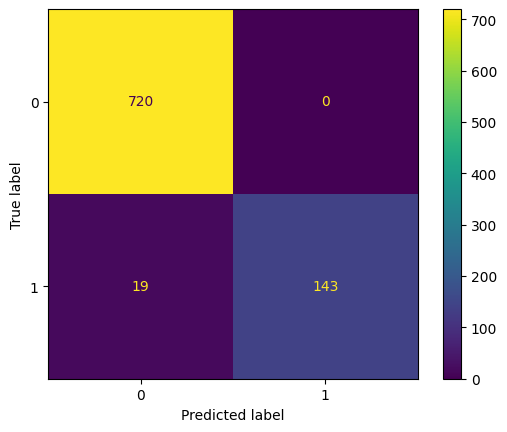

In [583]:
# Matriz de confusion
cm1= confusion_matrix(y_test, gboos.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

Se puede observar que el modelo predice casi todos los datos, teniendo un accuracy en los datos test del 0.98, y en la matriz de confusión se puede observar que solo unos pocos datos no se clasifican correctamente, pero al ser un falso negativo en este caso no es tan grave.

In [584]:
importancia=pd.DataFrame(gboos.feature_importances_).rename(columns={0:'importancia'})
gboos_var=pd.concat([columnas,importancia], axis=1).sort_values('importancia',ascending=False).head(7)
gboos_var

,columnas,importancia
8,TotalWorkingYears,0.112447
9,mean_time,0.089845
0,Age,0.078112
2,MonthlyIncome,0.070425
6,YearsWithCurrManager,0.043626
5,YearsSinceLastPromotion,0.038412
35,MaritalStatus_Single,0.038386


In [585]:
fig = px.bar(gboos_var, x='columnas', y='importancia', color = 'columnas',  title ='<b>Importancia de los factores que analiza el modelo<b>')
fig.update_layout(
    xaxis_title = 'Importancia de los factores',
    yaxis_title = 'Factores',
    template = 'simple_white',
    title_x = 0.5,
    showlegend=False)

##CONCLUSIÓN ENTREGA 2

Se llega a la conclusión de que el modelo que mejor precisión tiene es el de Gradient Boosting, tienendo unos hiperparametros seleccionados por el XGBoosting, dando como **resultado un modelo con precisión: Train = 1.00 / Test = 0.98**


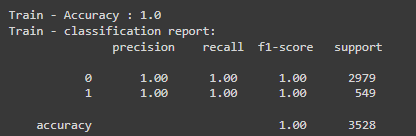


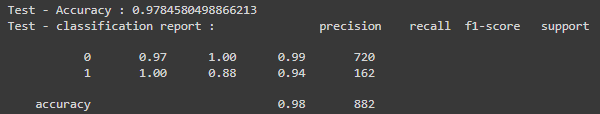

**La matriz de confusión también presenta un mayor desempeño a los otros modelos**

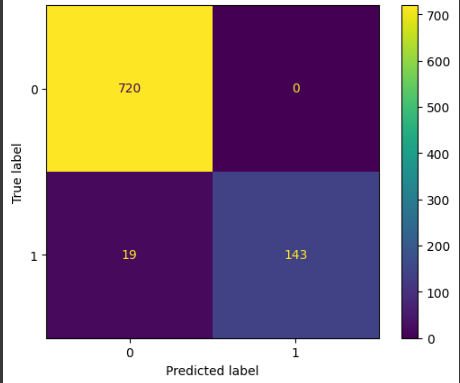

**Las 7 variables con mayor inflencia son:**


*   TotalWorkingYears
*   mean_time
*   Age
*   MonthlyIncome
*   YearsWithCurrManager
*   YearsSinceLastPromotion
*   MaritalStatus_Single



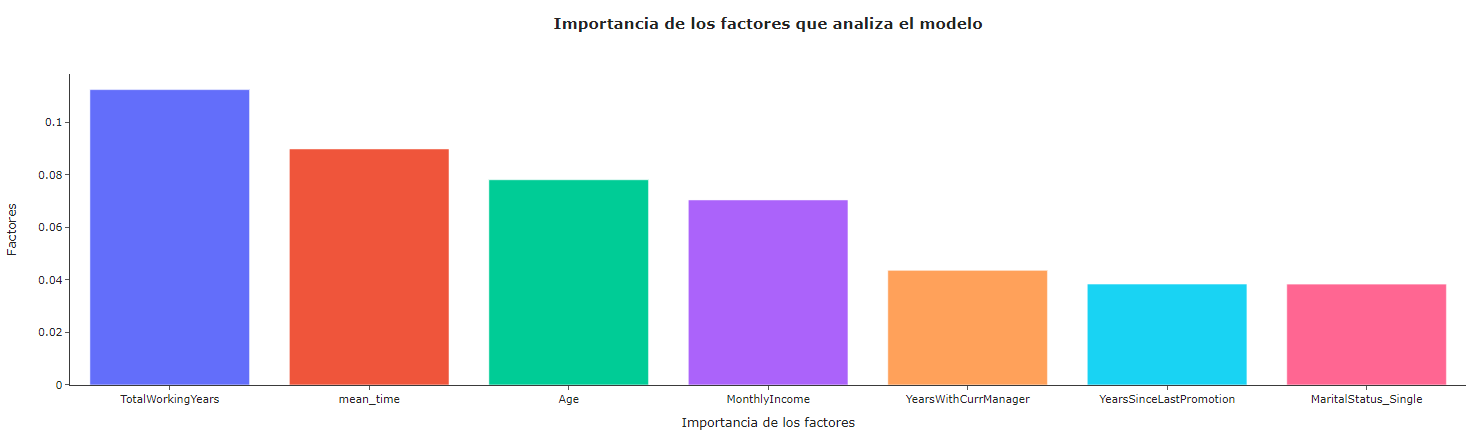